# Projet 4 - Notebook 1 - Anticipez les besoins en consommation électrique de bâtiments
**Problématique**
  Nous travaillons pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.
Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons **tenter de prédire les émissions de GES et la consommation totale d’énergie** de bâtiments pour lesquels elles n’ont pas encore été mesurées.
Notre prédiction se base sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction, …)
Nous cherchons également à évaluer l’intérêt de l’"[ENERGY STAR Score](https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv)" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement.

&nbsp;
**Mission**
  1. Réaliser une courte analyse exploratoire.
  2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

&nbsp;
**Interprétation et mise en œuvre**
  1. Recherche de modélisation des émissions de GES et de la consommation totale d’énergie à partir des données de l’échantillon en utilisant le machine learning (apprentissage supervisé).
  2. Examen de l’importance de l’“ENERGY STAR Score” sur la prédiction des émissions de GES pour en évaluer l’intérêt, en examinant la performance de la modélisation avec ou sans cette donnée, et, le cas échéant, le poids de cette donnée dans la modélisation.
  3. Conclusion sur la possibilité de généralisation en fonction du niveau de performance de la modélisation et de la nécessité d’utilisation ou pas de l’“ENERGY STAR Score”.


## *Notes sur la définition des variables au cœur de la mission de ce projet*
&nbsp;
***Calculs d'émission de GHG (Gaz à effet de serre - CO2)***
Le [site d'énergie star](https://https://www.energystar.gov/buildings/benchmark/understand_metrics/how) précise que ces calculs sont basés sur la quantité et le type d'énergie consommée par le bâtiment.

&nbsp;
***Energy Use Intensity (EUI) et les unités de mesure***
L'EUI permet d'évaluer la performance énergétique d'un bâtiment (cf [Energy Star datatrends](https://www.energystar.gov/datatrends) ou [Energy Star building help](https://www.energystar.gov/buildingshelp)).

EUI = Energy / sq ft / year = Total energy used over a year / Total GFA
1 kBtu (British thermal unit) = 293,071 Wh

&nbsp;
***Différence entre 'site EUI' et 'source EUI'*** :
Le 'site EUI' donne l'énergie consommée telle qu'elle figure sur le relevé de la facture.
Le 'source EUI' indique l'énergie équivalente totale nécessaire à l'alimentation du bâtiment, incluant les pertes de transport, de livraison et production. Elle est utile pour comparer la consommation entre les bâtiments.

&nbsp;
***Signification de EUI et EUIWN*** :
Le suffixe WN indique que la variable EUI a été normalisée en fonction des conditions météo (WN: Weather Normalized) afin d'améliorer la comparaison des données entre les années et mieux permettre de suivre l'évolution de consommation d'un bâtiment dans le temps.

## Livrables
Ce projet est mené en langage Python, utilisant principalement les librairies Numpy, Pandas, Matplotlib et Seaborn.
Les librairies utilisées pour le machine learning (Notebook 2) sont scikit-learn et xgboost.
Les versions sont vérifiées en début de script de ce Notebook.
L'IDE utilisé est Pycharm.

Le rapport est constitué des fichiers suivants :
- Notebook 1 d'analyse exploratoire : <font color='green'>Pelec_01_notebook_analyse_exploratoire.ipynb</font>
- Notebook 2 de test des modèles : <font color='green'>Pelec_02_tests_modeles.ipynb</font>
- Présentation en support de la soutenance : <font color='green'>Pelec_03_presentation.pdf</font>
- Fichier des fonctions Python utilisées par les notebooks : <font color='green'>Pelec_04_fonctions.py</font>

<a id="sommaire"></a>
## Sommaire
1 - [**Initialisations**: imports des librairies et fonctions, affichage des versions, options d'affichage, dossiers de fichiers de référence](#init)

2 - [**Prise de connaissance des jeux de données de 2015 et 2016**](#data)

3 - [**Mise en cohérence et concaténation des 2 jeux de données**](#consistency)
  1. [Mise en cohérence des données de localisation (variable 'Location')](#loc_var)
  2. [Suppression des variables non communes aux 2 jeux de données](#var_consistency)
  3. [Recherche de doublons](#duplicates)
  4. [Mise en cohérences des types de données entre les 2 jeux](#data_consistency)
  5. [Mise en cohérences des 2 jeux de données concernant les variables des données déclaratives du permis d’exploitation commerciale](#value_consistency)
  6. [Regroupement des 2 jeux de données](#merge)

4 - [**Réduction du jeu aux données et variables utiles au projet**](#dataset_reduction)
  1. [Examen des catégories de bâtiment et filtrage des données concernant les bâtiments destinés à l'habitation](#data_filter)
  2. [Filtrage direct de variables non utiles](#var_1st_filter)
  3. [Choix de variable de localisation](#var_loc)
  4. [Choix de la variable concernant l'énergie](#var_nrj)
  5. [Variables concernant l'utilisation du site et les surfaces associées](#var_pty)<br>
        1) [Mise en cohérence des variables de type d'utilisation](#type_consistency)<br>
        2) [Mise en cohérence des surfaces d'utilisation](#gfa_consistency)<br>
  6. [Variables concernant les émissions de GES](#var_ghg)
  7. [Bilan du jeu de données filtré](#filtered_dataset)

5 - [**Examen des valeurs aberrantes et autres contrôles de cohérence**](#outliers)
  1. [Variables numériques concernant les caractéristiques des bâtiments](#out_bat)
  2. [Variables numériques concernant les surfaces d'utilisation de site](#out_gfa)
  3. [Variables numériques concernant les coordonnées GPS](#out_gps)
  4. [Variable concernant l'énergie](#out_nrj)
  5. [Variable concernant les émissions de GES](#out_ghg)
  6. [Variable concernant le score ENERGYSTARScore](#out_score)

6 - [**Traitement des valeurs manquantes**](#missings)

7 - [**Analyses exploratoires univariées et préparation des données au machine learning**](#analyses)
  1. [Variables catégorielles de type et utilisation des bâtiments](#ea_type_n_use)<br>
      1) [Analyse préliminaire en vue de déterminer les catégories à retenir](#analyses)<br>
      2) [Regroupement des catégories selon la liste définie](#ea_type_n_use_cat)<br>
      3) [Transformation des variables catégorielles en variables numériques](#ea_trcat)<br>
  3. [Variable d'année du jeu de données](#ea_datayear)
  4. [Variable de coordonnées GPS](#ea_gps)
  5. [Variables de caractéristiques des bâtiments](#ea_building)
  6. [Variable énergie](#ea_nrj)
  7. [Variable émission de GES](#ea_ghg)
  8. [Variable EnergyStarScore](#ea_nrjstarscore)
  9. [Bilan du jeu de données transformé](#ea_bilan)

8 - [**Analyses exploratoires multivariées**](#multivar)
1. [Variables numériques entre elles](#multivar_num)
2. [Variables par paires (catégorielle, numérique)](#multivar_catnum)
3. [Bilan du jeu de données](#bilan_final)

<a id="init"></a>
## 1 - Import des librairies, initialisations et variables de répertoires et fichiers

In [1]:
# Import des librairies et fonctions
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import nltk
import sys

import Pelec_04_fonctions as fct

# Pour afficher les graphiques dans une fenêtre matplotlib ou dans le notebook
# Installer: pip install pyqt5 pyqt5-tools
# Pycharm: décocher settings>Tools>Python Scientific
# Pour afficher les graphiques dans le Notebook
%matplotlib inline
# Pour afficher les graphiques dans une fenêtre matplotlib
#%matplotlib qt

# Gestion des conflits d'installation de ipython et jupyter:
# - installer pipwin (pip install pipwin), puis
# - installer ipython et jupyter avec pipwin

# Display options
from IPython.display import (display, display_html, display_png, display_svg)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 199)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# Colorama
from colorama import Fore, Back, Style
# Fore: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Back: BLACK, RED, GREEN, YELLOW, BLUE, MAGENTA, CYAN, WHITE, RESET.
# Style: DIM, NORMAL, BRIGHT, RESET_ALL

# Affiche les versions de Python et packages
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      'Versions de Python et principales librairies utilisées :\n' +
      Style.RESET_ALL)
print('- Python : ' + sys.version)
print('- Numpy : ' + np.__version__)
print('- Pandas : ' + pd.__version__)
print('- Matplotlib : ' + mpl.__version__)
print('- Seaborn : ' + sns.__version__)
#print('- Jupyter:')
#!jupyter --version

Versions de Python et principales librairies utilisées :

- Python : 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:50:36) [MSC v.1929 64 bit (AMD64)]
- Numpy : 1.23.4
- Pandas : 1.5.1
- Matplotlib : 3.6.2
- Seaborn : 0.12.1


In [2]:
# Répertoire et fichier de données
dir_data = ".\Pelec_05_data"
file_data_2015 = "2015-building-energy-benchmarking"
file_data_2016 = "2016-building-energy-benchmarking"

# Répertoire des figures
dir_fig = ".\Pelec_06_figures"

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="data"></a>
## 2 - Prise de connaissance des jeux de données de 2015 et 2016
37 variables communes, 10 variables du jeu de 2015 ne sont pas présentes dans celui de 2016, et 9 variables du jeu de 2016 ne sont pas présentes dans celui de 2015.

In [3]:
# Chargement et prise de connaissance des 2 jeux de données
# Chargement et prise de connaissance du jeu de données 2015
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Chargement du jeu de données '{file_data_2015}.csv'\n" + Style.RESET_ALL)
data_2015 = pd.read_csv(dir_data + "\\" + file_data_2015 + ".csv", sep=',',
                   encoding='utf-8-sig', index_col=None, low_memory=False)
print(Fore.GREEN + f"► Informations sur le jeu de données '{file_data_2015}.csv':\n" + Style.RESET_ALL)
display(data_2015.info())
list_var_2015 = data_2015.columns.tolist()

# Chargement et prise de connaissance du jeu de données 2016
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Chargement du jeu de données '{file_data_2016}.csv'\n" + Style.RESET_ALL)
data_2016 = pd.read_csv(dir_data + "\\" + file_data_2016 + ".csv", sep=',',
                   encoding='utf-8-sig', index_col=None, low_memory=False)
print(Fore.GREEN + f"► Informations sur le jeu de données '{file_data_2016}.csv':\n" + Style.RESET_ALL)
display(data_2016.info())
list_var_2016 = data_2016.columns.tolist()

# Identifications des différences de variables entre les 2 jeux
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + f"Ecarts de variables entre 2015 et 2016\n" + Style.RESET_ALL)
list_dif = list(set(list_var_2015)-set(list_var_2016))
print(Fore.GREEN + f"► {len(list_var_2015)-len(list_dif)} variables communes entre les 2 années\n" + Style.RESET_ALL)
print(Fore.GREEN + f"► {len(list_dif)} variables présentes dans le jeu de 2015 et pas dans celui de 2016:" + Style.RESET_ALL)
display(list_dif)
list_dif = list(set(list_var_2016)-set(list_var_2015))
print(Fore.GREEN + f"► {len(list_dif)} variables présentes dans le jeu de 2016 et pas dans celui de 2015:" + Style.RESET_ALL)
display(list_dif)

# Export des variables dans un fichier pour structurer les données et préparer la mise en cohérence entre les 2 jeux
df1 = pd.DataFrame(data_2015.columns, columns=['2015']).set_index(keys='2015', drop=False)
df2 = pd.DataFrame(data_2016.columns, columns=['2016']).set_index(keys='2016', drop=False)
df = pd.concat([df1, df2], axis=1).reset_index(drop=True)
#df.to_csv(dir_data + "\\" + "variables.csv", sep=';', index=False)

Chargement du jeu de données '2015-building-energy-benchmarking.csv'

► Informations sur le jeu de données '2015-building-energy-benchmarking.csv':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Loc

None

Chargement du jeu de données '2016-building-energy-benchmarking.csv'

► Informations sur le jeu de données '2016-building-energy-benchmarking.csv':

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 


None

Ecarts de variables entre 2015 et 2016

► 37 variables communes entre les 2 années

► 10 variables présentes dans le jeu de 2015 et pas dans celui de 2016:


['Seattle Police Department Micro Community Policing Plan Areas',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'SPD Beats',
 'Zip Codes',
 '2010 Census Tracts',
 'Comment',
 'OtherFuelUse(kBtu)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts']

► 9 variables présentes dans le jeu de 2016 et pas dans celui de 2015:


['Longitude',
 'Latitude',
 'GHGEmissionsIntensity',
 'State',
 'City',
 'ZipCode',
 'Address',
 'Comments',
 'TotalGHGEmissions']

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="consistency"></a>
## 3 - Mise en cohérence et concaténation des 2 jeux de données
Cette section consiste à rendre cohérents les 2 jeux de données, c'est-à-dire avec les mêmes variables, puis à les concaténer pour en former un jeu unique.

<a id="loc_var"></a>
### 3.1 - Mise en cohérence des données de localisation (variable 'Location') :

In [4]:
# Données de la variable 'Location'
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Traitement de la variable 'Location' du jeu de 2015\n" + Style.RESET_ALL)
print(Fore.GREEN + "► Exemple de contenu de la variable :" + Style.RESET_ALL)
display(data_2015['Location'].head(1))

# Transformation des valeurs de la variable 'Location' en dictionnaire
# Attention à l'utilisation de 'literal_eval' et des erreurs engendrées
from ast import literal_eval
def f(x):
    try:
        return literal_eval(str(x))
    except Exception as e:
        print(e)
        return[]
data_2015['Location'] = data_2015.Location.apply(f)
# Répartition de chaque clé de dictionnaire comme nouvelle colonne du dataframe
data_2015 = pd.concat([data_2015.drop(['Location'], axis=1), data_2015['Location'].apply(pd.Series)], axis=1)

# idem pour 'human_address'
data_2015['human_address'] = data_2015.human_address.apply(f)
data_2015 = pd.concat([data_2015.drop(['human_address'], axis=1), data_2015['human_address'].apply(pd.Series)], axis=1)

# Résultat du traitement
print(Fore.GREEN + "► Nouvelles variables en lieu et place de 'Location' :" + Style.RESET_ALL)
display(data_2015[['latitude', 'longitude', 'address', 'city', 'state', 'zip']])

Traitement de la variable 'Location' du jeu de 2015

► Exemple de contenu de la variable :


0    {'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
Name: Location, dtype: object

► Nouvelles variables en lieu et place de 'Location' :


latitude     longitude         address        city   state  zip  
0     47.61219025  -122.33799744     405 OLIVE WAY  SEATTLE   WA   98101
1     47.61310583  -122.33335756       724 PINE ST  SEATTLE   WA   98101
2     47.61334897  -122.33769944      1900 5TH AVE  SEATTLE   WA   98101
3     47.61421585  -122.33660889    620 STEWART ST  SEATTLE   WA   98101
4      47.6137544   -122.3409238     401 LENORA ST  SEATTLE   WA   98121
...           ...            ...               ...      ...   ...    ...
3335  47.59950256  -122.32034302    321 10TH AVE S  SEATTLE   WA   98104
3336  47.65752471   -122.3160159  4123 12TH AVE NE  SEATTLE   WA   98105
3337  47.61649845  -122.33770787      2030 8TH AVE  SEATTLE   WA   98121
3338  47.68396954   -122.2874088   3801 NE 77TH ST  SEATTLE   WA   98115
3339  47.68396954   -122.2874088  7540 37TH AVE NE  SEATTLE   WA   98115

[3340 rows x 6 columns]

In [5]:
# Alignement des noms de variable entre les 2 jeux de données
data_2015.rename(columns={'latitude': 'Latitude',
                          'longitude': 'Longitude',
                          'address': 'Address',
                          'city': 'City',
                          'state': 'State',
                          'zip': 'ZipCode',
                          'Comment': 'Comments',
                          'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_consistency"></a>
### 3.2 - Suppression des variables non communes aux 2 jeux de données

In [6]:
# Suppression des variables non communes entre les 2 jeux
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
          f"Suppression des variables non communes entre les 2 jeux de données\n"
          + Style.RESET_ALL)
# Liste des variables non commune dans list_dif
list_var_2015 = data_2015.columns.tolist()
list_var_2016 = data_2016.columns.tolist()

# Suppression des variables du jeu de 2015 non présentes dans celui de 2016
list_dif = list(set(list_var_2015)-set(list_var_2016))
if len(list_dif) > 0:
    print(Fore.GREEN +
          f"► Suppression de {len(list_dif)} variables du jeu de 2015 non présentes dans le jeu de 2016 :"
          + Style.RESET_ALL)
    display(list_dif)
    data_2015.drop(labels=list_dif, axis=1, inplace=True)
else:
    print(Fore.GREEN + f"► Les variables du jeu de 2015 sont toutes présentes dans le jeu de 2016" + Style.RESET_ALL)

# Suppression des variables du jeu de 2015 non présentes dans celui de 2016
list_dif = list(set(list_var_2016)-set(list_var_2015))
if len(list_dif) > 0:
    print(Fore.GREEN +
          f"► Suppression des {len(list_dif)} variables du jeu de 2016 non présentes dans le jeu de 2015 :"
          + Style.RESET_ALL)
    display(list_dif)
    data_2016.drop(labels=list_dif, axis=1, inplace=True)
else:
    print(Fore.GREEN + f"► Les variables du jeu de 2016 sont toutes présentes dans le jeu de 2015" + Style.RESET_ALL)

Suppression des variables non communes entre les 2 jeux de données

► Suppression de 6 variables du jeu de 2015 non présentes dans le jeu de 2016 :


['Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats',
 'Zip Codes',
 '2010 Census Tracts',
 'OtherFuelUse(kBtu)',
 'City Council Districts']

► Les variables du jeu de 2016 sont toutes présentes dans le jeu de 2015


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="duplicates"></a>
### 3.3 - Recherche de doublons
Nous recherchons les doublons en nous appuyant sur la clé 'OSEBuildingID' et aucun des 2 jeux n'en contient.

Nous pourrions par ailleurs considérer les valeurs 2015 et 2016 d'un même bâtiment (même valeur de 'OSEBuildingID') comme des doublons par rapport à l'objectif de ce projet. Ce ne sera pas le cas : nous considérerons qu'il s'agit en fait de 2 usages différents d'un même bâtiment résultant de paramètres non couverts par les autres variables, comme par exemple les conditions climatiques.

In [7]:
# Recherche de doublons sur la clé 'OSEBuildingID'
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Recherche et suppression de doublons à partir de la clé 'OSEBuildingID'\n" +
      Style.RESET_ALL)
display(data_2015.loc[data_2015.duplicated(subset=['OSEBuildingID'], keep=False), :])
display(data_2016.loc[data_2016.duplicated(subset=['OSEBuildingID'], keep=False), :])

Recherche et suppression de doublons à partir de la clé 'OSEBuildingID'



Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity, DefaultData, Comments, ComplianceStatus, Outlier, Latitude, Longitude, Address, City, State, ZipCode]
Index: []

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="data_consistency"></a>
### 3.4 - Mise en cohérences des types de données entre les 2 jeux

In [8]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Mise en cohérence des types de données\n" + Style.RESET_ALL)

# Vérification de l'égalité des types de variable entre les 2 jeux
print(Fore.GREEN + "► Différences à corriger s'agissant des types de variable entre les 2 jeux :" + Style.RESET_ALL)
df = pd.concat([pd.DataFrame(data_2015.dtypes), pd.DataFrame(data_2016.dtypes)], axis=1, ignore_index=True)
df.rename(columns={0: '2015', 1: '2016'}, inplace=True)
display(df[df['2015']!=df['2016']])

# Alignement des types de variable entre les jeux
list_var = (df[df['2015']!=df['2016']]).index.tolist()
for i in (0,2,4,5,6):
    data_2015[list_var[i]] = data_2015[list_var[i]].astype(data_2016[list_var[i]].dtypes)
for i in (1,3):
    data_2016[list_var[i]] = data_2016[list_var[i]].astype(data_2015[list_var[i]].dtypes)

Mise en cohérence des types de données

► Différences à corriger s'agissant des types de variable entre les 2 jeux :


2015     2016  
NumberofBuildings    int64  float64
NumberofFloors     float64    int64
DefaultData         object     bool
Comments            object  float64
Latitude            object  float64
Longitude           object  float64
ZipCode             object  float64

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="value_consistency"></a>
### 3.5 - Mise en cohérences des 2 jeux de données concernant les variables des données déclaratives du permis d’exploitation commerciale
Nous nous concentrons sur les variables concernant les données déclaratives du permis d’exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction, …) et comparons les données entre les jeux en nous appuyant sur la clé 'OSEBuildingID'.
Après examen des différences (visualiser en supprimant le caractère de commentaire pour les lignes 42 et 43), nous pouvons conclure que nous pouvons retenir comme référence les valeurs du jeu de 2016 et corrigeons en conséquence.

In [9]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Mise en cohérences des 2 jeux de données concernant les variables des données déclaratives du permis d’exploitation commerciale\n" +
      Style.RESET_ALL)

# Liste des variables à examiner
list_var = ['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode']

# Création des dataframes pour la liste, en initialisant les index avec la clé 'OSEBuildingID'
df_15 = data_2015[list_var].copy()
df_15.set_index(keys='OSEBuildingID', drop=False, inplace=True)
df_16 = data_2016[list_var].copy()
df_16.set_index(keys='OSEBuildingID', drop=False, inplace=True)

# Suppression des index du jeu de 2015 non présents dans celui de 2016
list_idx = list(set(df_15.index.tolist())-set(df_16.index.tolist()))
if len(list_idx) > 0:
    print(Fore.GREEN + "► Suppression de", len(list_idx), "entrées du jeu 2015\n" + Style.RESET_ALL)
    df_15.drop(labels=list_idx, axis=0, inplace=True)

# Suppression des index du jeu de 2016 non présents dans celui de 2015
list_idx = list(set(df_16.index.tolist())-set(df_15.index.tolist()))
if len(list_idx) > 0:
    print(Fore.GREEN + "► Suppression de", len(list_idx), "entrées du jeu 2015\n" + Style.RESET_ALL)
    df_16.drop(labels=list_idx, axis=0, inplace=True)

# Alignement des index
df_15.sort_index(inplace=True)
df_16.sort_index(inplace=True)

# Comparaison
df = df_16.compare(df_15, keep_shape=True)
df.rename(columns={'self': '2016', 'other': '2015'}, inplace=True)

# Affichage des comparaisons par variable et correction des écarts
# Utilisation de 'OSEBuildingID' en tant qu'index pour faire les corrections
data_2015.set_index(keys='OSEBuildingID', inplace=True)
data_2016.set_index(keys='OSEBuildingID', inplace=True)
list_var.remove('OSEBuildingID')
n_changes = 0
for var in list_var:
    df_cmp = df[var].dropna(how='all')
    #print(Fore.GREEN + "► Comparaison concernant la variable :" + Style.RESET_ALL, var)
    #display(df_cmp)
    data_2015.loc[df_cmp.index, var] = data_2016.loc[df_cmp.index, var]
    n_changes += len(df_cmp)
print(Fore.GREEN + "► Corrections effectuées :" + Style.RESET_ALL, n_changes)

# Réintégration de 'OSEBuildingID' en tant que variable et réinitialisation des index
data_2015.reset_index(inplace=True)
data_2016.reset_index(inplace=True)

Mise en cohérences des 2 jeux de données concernant les variables des données déclaratives du permis d’exploitation commerciale

► Suppression de 56 entrées du jeu 2015

► Suppression de 92 entrées du jeu 2015

► Corrections effectuées : 19396


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="merge"></a>
### 3.6 - Regroupement des 2 jeux de données

In [10]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Concaténation des 2 jeux de données\n" + Style.RESET_ALL)
data = pd.concat([data_2015, data_2016], ignore_index=True)
print(Fore.GREEN + "► Dimensions du jeu de données concaténé :" + Style.RESET_ALL, f"{data.shape}")
display(data.info())

Concaténation des 2 jeux de données

► Dimensions du jeu de données concaténé : (6716, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6715 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6701 non-null   float64
 10  NumberofFloors                   6716 non-null   floa

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="dataset_reduction"></a>
## 4 - réduction du jeu aux données et variables utiles au projet
Dans ce chapitre, nous réduisons le jeu aux données et variables utiles à l'objectif du projet :
- Filtrage des données concernant les bâtiments destinés à l’habitation.
- Filtrage des variables qui ne nous serons pas utiles à la prédiction de consommation d'énergie et d'émission de CO2.
Pour mémoire, notre prédiction doit se baser sur les <font color='orange'>données déclaratives du permis d’exploitation commerciale</font> (taille et usage des bâtiments, mention de travaux récents, date de construction, …)

<a id="data_filter"></a>
### 4.1 - Examen des catégories de bâtiment et filtrage des données concernant les bâtiments destinés à l'habitation
Etant donné que le projet se concentre sur les bâtiments non destinés à l’habitation, nous filtrons les données concernant les autres utilisations.
Pour cela, nous examinons les catégories des 2 variables 'BuildingType' et 'PrimaryPropertyType' pour lesquelles nous constatons que le mot clé est 'Multifamily'. Nous filtrons les individus du jeu de données qui sont exclusivement destinées au résidentiel, mais conservons ceux qui sont mixtes : nous filtrons donc les individus pour lesquels 'BuildingType' ET 'PrimaryPropertyType' contiennent le mot clé 'Multifamily'.

Nous en profitons pour examiner plus avant les nombres et valeurs des catégories et sous-catégories et corrigeons au passage les valeurs de 'PrimaryPropertyType' qui contiennent '\n'.

In [11]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Réduction du jeu aux bâtiments non destinés à l’habitation\n" + Style.RESET_ALL)
print(Fore.GREEN + "► Catégories initiales de bâtiment : " + Style.RESET_ALL, f"{data['BuildingType'].nunique()}\n{data['BuildingType'].unique()}\n")
print(Fore.GREEN + "► Sous-catégories initiales de bâtiment :" + Style.RESET_ALL,
      f"{data['PrimaryPropertyType'].nunique()}\n{data['PrimaryPropertyType'].unique()}\n")

# Suppression des '\n' dans les valeurs de 'PrimaryPropertyType'
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].apply([lambda x: x.replace('\n', '')])

Réduction du jeu aux bâtiments non destinés à l’habitation

► Catégories initiales de bâtiment :  8
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']

► Sous-catégories initiales de bâtiment : 26
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital' 'Residence Hall'
 'Distribution Center' 'Worship Facility' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse'
 'High-Rise Multifamily' 'Restaurant' 'Restaurant\n' 'Office']



In [12]:
# Suppression des catégories contenant le mot 'Multifamily'
mask = data['BuildingType'].str.contains('Multifamily', regex=False) & data['PrimaryPropertyType'].str.contains('Multifamily', regex=False)
data = data.loc[~mask,:]

# Affichage des individus mixtes contenant 'Multifamily'
mask = data['BuildingType'].str.contains('Multifamily', regex=False) | data['PrimaryPropertyType'].str.contains('Multifamily', regex=False)
print(Fore.GREEN + "► Bâtiments mixte résidentiels et non-résidentiels :" + Style.RESET_ALL)
display(data.loc[mask,:])

# Conversion en variables catégorielles
data['BuildingType'] = data['BuildingType'].astype("category")
data['PrimaryPropertyType'] = data['PrimaryPropertyType'].astype("category")

print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Bâtiments mixte résidentiels et non-résidentiels :


OSEBuildingID  DataYear      BuildingType         PrimaryPropertyType                       PropertyName                  TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood       YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)                                    ListOfAllPropertyUseTypes                                        LargestPropertyUseType     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  DefaultData Comments        ComplianceStatus          Outlier     Latitude  Longitude  \
649       19445        2015          NonResidential         Low-Rise Multifamily                                 Pacific Pointe           0354000254                    4                      LAKE UNION    2000            1.0               3.0             93079              36093                 56986                                                                                      Multifamily Housing          Multifamily Housing           91064.0                                NaN                     NaN                                     NaN                  NaN                       NaN                  94.0              28.2               28.2                88.7                 88.7              1.610e+06             1.610e+06           0.000e+00        4.718e+05         1.610e+06               0.000          0.000e+00            11.22               0.05               True       NaN                       Compliant           NaN   47.649   -122.333    
651       19451        2015    Multifamily LR (1-4)        Senior Care Community                      Paramount Rehab & Nursing           0424049024                    3                         CENTRAL    1963            1.0               3.0             66402                  0                 66402                                                                                    Senior Care Community        Senior Care Community          132804.0                                NaN                     NaN                                     NaN                  NaN                       NaN                  83.0              62.7               69.2               106.5                114.9              8.331e+06             9.195e+06           0.000e+00        7.567e+05         2.582e+06           57492.000          5.749e+06           323.34               4.70               True       NaN                       Compliant           NaN   47.595   -122.298    
666       19498        2015    Multifamily LR (1-4)           Mixed Use Property                                   Yesler Place           0007600129                    3                         CENTRAL    2005            1.0               4.0             37849              14997                 22852                                                                     Multifamily Housing, Office, Parking          Multifamily Housing           11980.0                             Office                 10872.0                                 Parking               5500.0                       NaN                   NaN              25.3               27.0                79.5                 84.8              5.788e+05             6.169e+05           0.000e+00        1.696e+05         5.788e+05               0.000          0.000e+00             4.03               0.04               True       NaN                       Compliant           NaN   47.602   -122.314    
670       19510        2015    Multifamily LR (1-4)           Mixed Use Property                   The Admiral

► Nouvelles dimensions du jeu de données : (3426, 46)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_1st_filter"></a>
### 4.2 - Filtrage direct de variables non utiles
Nous filtrons dans un premier temps les variables non utiles à ce projet, sachant que nous examinerons par la suite plus avant les variables de localisation, énergie et émission de CO2 :
- City(une seule valeur 'Seattle')
- State (une seule valeur 'WA')
- DefaultData
- Comments
- ComplianceStatus
- Outlier
- YearsENERGYSTARCertified

In [13]:
# Filtrage des variables non retenues
filter_list = ['City', 'State', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier', 'YearsENERGYSTARCertified']
data.drop(labels=filter_list, axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Nouvelles dimensions du jeu de données : (3426, 39)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_loc"></a>
### 4.3 - Choix de variable de localisation
Le jeu comporte de nombreuses variables relatives à la localisation des bâtiments et nous recherchons la ou les plus pertinentes.
Une variable pertinente doit permettre d'associer une performance énergétique et d'émission CO2 du bâtiment en relation avec sa localisation, ce qui conduit à l'alternative suivante :
- favoriser une variable avec peu de catégories pour étudier l'influence de la zone géographique sur la consommation et les émissions ;
- favoriser une variable avec un grand nombre de catégories pour permettre en outre de déterminer des zones de consommations et émissions spécifiques.

Nous favorisons la seconde option.

Nous ne conservons pas la variable 'Address' car difficile à exploiter.
Par ailleurs, ces variables contiennent très peu de manquants et ce ne sera donc pas un critère de décision.
Nous pouvons en conséquence conserver 'TaxParcelIdentificationNumber', ou bien le couple 'Longitude' et 'Latitude', ce dernier offrant une localisation précise et ordonnée alors que nous ne connaissons pas la logique géographique du premier et pouvons douter de son caractère ordonné. Nous vérifions que le jeu de coordonnées est bien cohérent avec la ville de Seattle en affichant les marqueurs de localisation sur la carte: les données semblent correctes.
Nous conservons en conséquence les données (Latitude, Longitude).


In [14]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Choix de la variable de localisation\n" + Style.RESET_ALL)

# Liste des variables de localisation
loc_var = ['TaxParcelIdentificationNumber', 'Address', 'ZipCode', 'Latitude', 'Longitude', 'CouncilDistrictCode', 'Neighborhood']

# Examen des variables: manquants et nombre de catégories
print(Fore.GREEN + "► Manquants et nombre de catégories par variable:" + Style.RESET_ALL)
df = pd.DataFrame([])
df['manquants %'] = 100.0 * data[loc_var].isnull().sum(axis=0) / data.shape[0]
df['manquants'] = data[loc_var].isnull().sum(axis=0)
df['categories'] = data[loc_var].nunique()
with pd.option_context('display.float_format', '{:0.0f}%'.format):
    display(df.sort_values(by='categories', ascending=False))

# Vérification de la qualité des variables 'Latitude' et 'Longitude'
print(Fore.GREEN + "► Vérification des données de latitude et longitude :" + Style.RESET_ALL)
import folium
seattle_lat = 47.6062095
seattle_lon = -122.3320708
map = folium.Map(location=[seattle_lat, seattle_lon],zoom_start=11)
for index, location in data[['Latitude', 'Longitude', 'PropertyName']].iterrows():
    folium.Marker([location['Latitude'],location['Longitude']], popup=location['PropertyName']).add_to(map)
display(map)

# Filtrage des variables non retenues
filter_list = ['TaxParcelIdentificationNumber', 'Address', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood']
data.drop(labels=filter_list, axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données après filtrage :" + Style.RESET_ALL, f"{data.shape}")

Choix de la variable de localisation

► Manquants et nombre de catégories par variable:


manquants %  manquants  categories
Address                            0%           0         1732   
TaxParcelIdentificationNumber      0%           0         1670   
Latitude                           0%           0         1575   
Longitude                          0%           0         1488   
ZipCode                            0%          16           48   
Neighborhood                       0%           0           19   
CouncilDistrictCode                0%           0            7

► Vérification des données de latitude et longitude :


► Nouvelles dimensions du jeu de données après filtrage : (3426, 34)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_nrj"></a>
### 4.4 - Choix de la variable concernant l'énergie
Notre objectif consiste à prédire la consommation totale d'énergie du site, qui correspond à la variable 'SiteEnergyUse(kBtu)'.
Nous éliminons les autres variables, car elles ne sont pas utiles et source de "fuite de données", ces données n'étant normalement pas disponibles puisque l'objet du projet est de modéliser cette consommation afin de pouvoir la prédire sans effectuer de mesure.
Reste à décider quelle variable conserver entre la consommation effective ou celle normalisée par rapport aux conditions météorologiques.
Cette dernière variable présente l'avantage de rendre les données de consommation plus cohérentes entre 2015 et 2016, mais elle diminue en revanche l'intérêt de disposer d'un jeu par année en les rapprochant de doublons. Par ailleurs, nous ne connaissons pas le calcul de normalisation et nous préférons nous en tenir à la réalité des consommations énergétiques du site. Nous choisissons donc de conserver 'SiteEnergyUse(kBtu)'.



In [15]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Choix de la variable concernant l'énergie\n" + Style.RESET_ALL)
# Liste des variables concernant l'énergie
nrj_list = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
            'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
            'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']

# Population non renseignée
print(Fore.GREEN + "► Données non renseignées :" + Style.RESET_ALL)
display(data.loc[data['SiteEnergyUse(kBtu)'].isnull(),:])
data.dropna(subset='SiteEnergyUse(kBtu)', inplace=True)

# Filtrage des autres variables d'énergie
nrj_list.remove('SiteEnergyUse(kBtu)')
data.drop(labels=nrj_list, axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

Choix de la variable concernant l'énergie

► Données non renseignées :


OSEBuildingID  DataYear    BuildingType        PrimaryPropertyType                     PropertyName                YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  Latitude  Longitude
62           87        2015    SPS-District K-12                  K-12 School                  Arbor Heights Elementary    1948            1.0               2.0             53352                0                   53352                    K-12 School          K-12 School                65568.0                        NaN                             NaN                          NaN                          NaN                     NaN               NaN                NaN                 NaN                  NaN                  NaN                   NaN                 NaN              NaN               NaN                 NaN                NaN               NaN                  NaN             47.510   -122.378 
719       19694        2015    SPS-District K-12                  K-12 School                 Mann Building (Nova High)    1925            1.0               2.0             37327                0                   37327                    K-12 School          K-12 School                48887.0                        NaN                             NaN                          NaN                          NaN                     NaN               NaN                NaN                 NaN                  NaN                  NaN                   NaN                 NaN              NaN               NaN                 NaN                NaN               NaN                  NaN             47.608   -122.301 
1358      21570        2015    SPS-District K-12                  K-12 School               Hazel Wolf K-8 at Pinehurst    1950            1.0               1.0             34005                0                   34005                    K-12 School          K-12 School                50337.0                        NaN                             NaN                          NaN                          NaN                     NaN               NaN                NaN                 NaN                  NaN                  NaN                   NaN                 NaN              NaN               NaN                 NaN                NaN               NaN                  NaN             47.713   -122.315 
1360      21578        2015    SPS-District K-12                  K-12 School                   Genesee Hill Elementary    1949            1.0               1.0             41221                0                   41221                    K-12 School          K-12 School                60814.0                        NaN                             NaN                          NaN                          NaN                     NaN               NaN                NaN                 NaN                  NaN                  NaN                   NaN                 NaN              NaN               NaN                 NaN                NaN               NaN                  NaN             47.565   -122.397 
2108      24408        2015    SPS-District K-12                  K-12 School             WILSON-PACIFIC (SPS-DISTRICT)    1953            1.0               1.0            110830                0                  110830                    K-12 School          K-12 School               110830.0                        NaN                             NaN                          NaN                   

► Nouvelles dimensions du jeu de données : (3417, 24)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_pty"></a>
### 4.5 - Variables concernant l'utilisation du site et les surfaces associées
L'objectif est de conserver les 3 paires de principaux types d'utilisation et de surfaces associées avec la meilleure qualité possible de donnée. En effet, la consommation étant dépendant du type d'utilisation, cette information est cruciale pour notre modèle.

Avant de procéder au filtrage des variables non retenues, nous allons au préalable faire des vérifications de cohérence sur les variables restantes afin de pouvoir les utiliser autant que de besoin pour apporter d'éventuels compléments d'information aux variables que nous conservons.

Dans un premier temps, nous fiabilisons les variables d'utilisation, et dans un second temps, nous fiabilisons les variables de surface.

#### 1) Fiabilisation des variables de principaux types d'utilisation du site
 Dans ce but, nous transformons tout d'abord ces variables en variables catégorielles se référant toutes les 3 à la même liste de catégories.


In [16]:
# Alignement des catégories des 3 principaux types d'utilisation du site
# Liste globale des catégories dans la variable 'useTypes'
df = pd.DataFrame(np.concatenate([data['LargestPropertyUseType'].unique(), data['SecondLargestPropertyUseType'].unique(),
                                  data['ThirdLargestPropertyUseType'].unique()]))
df = df.sort_values(by=0)
useTypes = list(pd.unique(df[0].values))[:-1]
# Mise au type 'categoriel' des variables de type d'utilisation
data['LargestPropertyUseType'] = pd.Categorical(data['LargestPropertyUseType'], categories=useTypes)
data['SecondLargestPropertyUseType'] = pd.Categorical(data['SecondLargestPropertyUseType'], categories=useTypes)
data['ThirdLargestPropertyUseType'] = pd.Categorical(data['ThirdLargestPropertyUseType'], categories=useTypes)
# Affichage des catégories
print(Fore.GREEN + f"► {len(useTypes)} catégories d'utilisation des sites :" + Style.RESET_ALL, f"{data.shape}")
display(useTypes)

► 65 catégories d'utilisation des sites : (3417, 24)


['Adult Education',
 'Automobile Dealership',
 'Bank Branch',
 'Bar/Nightclub',
 'College/University',
 'Convenience Store without Gas Station',
 'Convention Center',
 'Courthouse',
 'Data Center',
 'Distribution Center',
 'Enclosed Mall',
 'Fast Food Restaurant',
 'Financial Office',
 'Fire Station',
 'Fitness Center/Health Club/Gym',
 'Food Sales',
 'Food Service',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Library',
 'Lifestyle Center',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Movie Theater',
 'Multifamily Housing',
 'Museum',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Lodging/Residential',
 'Other - Mall',
 'Other - Public Services',
 'Other - Recreation',
 'Other - Restaurant/Bar',
 'Other - Services',
 'Other - Technology/Science',
 'Other - Utility',
 'Other/Specialty Hospital',
 'Outpatient Rehabilitation/Physical Therapy',
 'Parking',
 'Pe

<a id="type_consistency"></a>
#### Mise en cohérence des variables de type d'utilisation
Nous effectuons les vérifications suivantes :
- Vérifications en relation avec les valeurs manquantes :
  - si 'LargestPropertyUseType' a une valeur manquante, alors les 2 autres variables d'utilisation de site doivent avoir des valeurs manquantes sur le même individu (bâtiment) ;
  - si 'SecondLargestPropertyUseType' a une valeur manquante, alors 'ThirdLargestPropertyUseType' doit également avoir sa valeur manquante sur le même individu (bâtiment).

- Vérification que les catégories d'utilisation de chacun des 3 types principaux sont deux à deux différentes pour le même individu (bâtiment). Dans le cas contraire, les valeurs redondantes des variables de moindre priorité sont forcées à valeur manquante et leurs valeurs de surface forcées à 0.

In [17]:
# Vérification de la cohérence entre les 3 valeurs d'utilisation - valeurs manquantes
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Vérification de la cohérence entre les 3 valeurs d'utilisation - valeurs manquantes\n" + Style.RESET_ALL)
mask1 = data['LargestPropertyUseType'].isnull() & (~data['SecondLargestPropertyUseType'].isnull() | ~data['ThirdLargestPropertyUseType'].isnull())
mask2 = data['SecondLargestPropertyUseType'].isnull() & ~data['ThirdLargestPropertyUseType'].isnull()
if mask1.sum() > 0:
    print(Fore.GREEN + "► Incohérences de valeur entre l'utilisation principales et les 2 autres :" + Style.RESET_ALL)
    display(data[['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']].loc[mask1,:])
if mask2.sum() > 0:
    print(Fore.GREEN + "► Incohérences de valeur entre les 2 utilisations secondaires :" + Style.RESET_ALL)
    display(data[['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']].loc[mask2,:])
if mask1.sum()+mask2.sum() == 0:
    print(Fore.GREEN + "► Pas d'incohérences de valeur s'agissant des valeurs manquantes\n" + Style.RESET_ALL)

Vérification de la cohérence entre les 3 valeurs d'utilisation - valeurs manquantes

► Pas d'incohérences de valeur s'agissant des valeurs manquantes



In [18]:
# Vérification de la cohérence entre les 3 valeurs d'utilisation - les 3 utilisations principales doivent être toutes différentes
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Vérification de la cohérence entre les 3 valeurs d'utilisation - valeurs différentes entre elles\n" + Style.RESET_ALL)
mask1 = (data['LargestPropertyUseType'] == data['SecondLargestPropertyUseType'])
mask2 = (data['LargestPropertyUseType'] == data['ThirdLargestPropertyUseType'])
mask3 = (data['SecondLargestPropertyUseType'] == data['ThirdLargestPropertyUseType'])
if mask1.sum()+mask2.sum()+mask3.sum() > 0:
    print(Fore.GREEN + "► Incohérences entre les valeurs des 3 utilisations principales" + Style.RESET_ALL)
    df = data[['OSEBuildingID', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
               'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']].loc[mask1 | mask2 | mask3,:]
    display(df.sort_values(by='OSEBuildingID').head(100))
    # Corrections
    data.loc[mask1,'SecondLargestPropertyUseType'] = np.NaN
    data.loc[mask1,'SecondLargestPropertyUseTypeGFA'] = 0
    data.loc[mask2 | mask3,'ThirdLargestPropertyUseType'] = np.NaN
    data.loc[mask2 | mask3,'ThirdLargestPropertyUseTypeGFA'] = 0
    print(Fore.GREEN + "  → Correction des", len(df), "entrées\n" + Style.RESET_ALL)
else:
    print(Fore.GREEN + "► Les valeurs des 3 utilisations principales sont toutes différentes pour chaque observation\n" + Style.RESET_ALL)

Vérification de la cohérence entre les 3 valeurs d'utilisation - valeurs différentes entre elles

► Incohérences entre les valeurs des 3 utilisations principales


OSEBuildingID   LargestPropertyUseType    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA
359         500      Supermarket/Grocery Store          121087.0                            Parking                     0.0                        Parking                          0.0            
3696        500      Supermarket/Grocery Store          121087.0                            Parking                     0.0                        Parking                          0.0            
545         732      Supermarket/Grocery Store          168735.0                            Parking                     0.0                        Parking                          0.0            
3882        732      Supermarket/Grocery Store          168735.0                            Parking                     0.0                        Parking                          0.0            
598         796                         Office          245240.0                            Parking                  5616.0                        Parking                       5616.0            
3934        796                         Office          245240.0                            Parking                  5616.0                        Parking                       5616.0            
3126      29069          Senior Care Community          132284.0              Senior Care Community                132284.0                            NaN                          NaN            
6424      29069          Senior Care Community          132284.0              Senior Care Community                132284.0                            NaN                          NaN            
3173      40034                         Office           31845.0                             Office                 31845.0                            NaN                          NaN            
6472      40034                         Office           31845.0                             Office                 31845.0                            NaN                          NaN

  → Correction des 10 entrées



In [19]:
# Examen statistique des variables de type d'utilisation
print(Fore.GREEN + "► Examen statistique des variables de type d'utilisation du site :" + Style.RESET_ALL)
display(data[['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']].describe())

► Examen statistique des variables de type d'utilisation du site :


LargestPropertyUseType SecondLargestPropertyUseType ThirdLargestPropertyUseType
count            3402                       1773                            734       
unique             57                         48                             40       
top            Office                    Parking                   Retail Store       
freq              994                        721                            109

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="gfa_consistency"></a>
#### 2) Mise en cohérence des surfaces d'utilisation
Afin de réaliser cette mise cohérence, nous faisons l'hypothèse que les valeurs de surface globale du site (PropertyGFATotal) et surface de parking (PropertyGFAParking) constituent la référence la plus fiable. Nous vérifions au préalable cette hypothèse en vérifiant la cohérence entre la somme 'PropertyGFAParking' + 'PropertyGFABuilding(s)' et 'PropertyGFATotal'.

Nous effectuons ensuite les opérations suivantes :
- Identification des individus pour lesquels les surfaces de parking (utilisation et total) sont différentes et corrigeons en forçant la valeur de surface d'utilisation de parking à celle de la valeur de référence 'PropertyGFAParking'.
&nbsp;
- Traitement des valeurs de surface d'utilisation nulles : si une valeur de surface d'utilisation est nulle, alors il ne doit pas y avoir de type d'utilisation associée ; nous détectons ces situations et réagençons en conséquence le jeu de données (décalage vers la gauche des types d'utilisation).
&nbsp;
- Mise en cohérence de la somme des 3 surfaces principales d'utilisation avec la surface totale.

##### Vérification de cohérence entre les surfaces totales du site, les surfaces de parking et les surfaces de bâtiment

In [20]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Vérification de cohérence concernant les surfaces totale du site\n" + Style.RESET_ALL)
# Vérification de la cohérence entre 'PropertyGFAParking' + 'PropertyGFABuilding(s)' et 'PropertyGFATotal'
data['check_GFA_total'] = (data['PropertyGFAParking'] + data['PropertyGFABuilding(s)']) / data['PropertyGFATotal']
print(Fore.GREEN + "► Rapport entre 'PropertyGFAParking' + 'PropertyGFABuilding(s)' et 'PropertyGFATotal' :" + Style.RESET_ALL)
display(data['check_GFA_total'].describe())

Vérification de cohérence concernant les surfaces totale du site

► Rapport entre 'PropertyGFAParking' + 'PropertyGFABuilding(s)' et 'PropertyGFATotal' :


count    3417.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: check_GFA_total, dtype: float64

##### Identification et traitement des individus pour lesquels les surfaces de parking (utilisation et total) sont différentes

In [21]:
# Vérification et mise en cohérence des valeurs de surface de parking
print(Fore.GREEN +
      "► Vérification de cohérence des valeurs de surface d'utilisation de parking avec la surface totale de parking:"
      + Style.RESET_ALL)
var_usetypes = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
var_usegfa = ['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
#var_totgfa = ['PropertyGFATotal', 'PropertyGFAParking']
#var = var_usetypes + var_usegfa + var_totgfa
for vtypes, vgfa in zip(var_usetypes, var_usegfa):
    mask = ((data[vtypes]=='Parking') & (data[vgfa]!=data['PropertyGFAParking']))
    if mask.sum()>0:
        print(Fore.GREEN +
          f"  → Incohérence de surface d'utilisation de parking avec la surface totale de parking, variable {vtypes} :"
          + Style.RESET_ALL)
        #display(data[[vtypes, vgfa, 'PropertyGFAParking']].loc[mask,:])
        data.loc[mask, vgfa] = data.loc[mask, 'PropertyGFAParking']
        print(Fore.GREEN + f"  → {mask.sum()} corrections effectuées\n" + Style.RESET_ALL)
    else:
        print(Fore.GREEN + f"Pas d'incohérence concernant la variable {vtypes}\n" + Style.RESET_ALL)

► Vérification de cohérence des valeurs de surface d'utilisation de parking avec la surface totale de parking:
  → Incohérence de surface d'utilisation de parking avec la surface totale de parking, variable LargestPropertyUseType :
  → 41 corrections effectuées

  → Incohérence de surface d'utilisation de parking avec la surface totale de parking, variable SecondLargestPropertyUseType :
  → 465 corrections effectuées

  → Incohérence de surface d'utilisation de parking avec la surface totale de parking, variable ThirdLargestPropertyUseType :
  → 65 corrections effectuées



##### Traitement des valeurs de surface d'utilisation nulles

Il s'agit de vérifier que si une valeur de surface d'utilisation est nulle, alors il ne doit pas y avoir de type d'utilisation associée : nous détectons ces situations et décalons en conséquence (vers la gauche) les priorités d'utilisation.

In [22]:
# Vérification des valeurs de surface d'utilisation nulles
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Vérification des valeurs de surface d'utilisation nulles\n" + Style.RESET_ALL)
# Valeur nulle sur la 3ème utilisation
mask = data['ThirdLargestPropertyUseTypeGFA'] == 0
data.loc[mask, 'ThirdLargestPropertyUseType'] = np.NaN
print(Fore.GREEN + f"► {mask.sum()} corrections effectuées pour la 3ème utilisation" + Style.RESET_ALL)

# Valeur nulle sur la seconde utilisation
mask = data['SecondLargestPropertyUseTypeGFA'] == 0
data.loc[mask, 'SecondLargestPropertyUseType'] = data.loc[mask, 'ThirdLargestPropertyUseType']
data.loc[mask, 'SecondLargestPropertyUseTypeGFA'] = data.loc[mask, 'ThirdLargestPropertyUseTypeGFA']
data.loc[mask, 'ThirdLargestPropertyUseType'] = np.NaN
data.loc[mask, 'ThirdLargestPropertyUseTypeGFA'] = 0
print(Fore.GREEN + f"► {mask.sum()} corrections effectuées pour la 2nde utilisation" + Style.RESET_ALL)

# Valeur nulle sur la première utilisation
mask = data['LargestPropertyUseTypeGFA'] == 0
data.loc[mask, 'LargestPropertyUseType'] = data.loc[mask, 'SecondLargestPropertyUseType']
data.loc[mask, 'LargestPropertyUseTypeGFA'] = data.loc[mask, 'SecondLargestPropertyUseTypeGFA']
data.loc[mask, 'SecondLargestPropertyUseType'] = data.loc[mask, 'ThirdLargestPropertyUseType']
data.loc[mask, 'SecondLargestPropertyUseTypeGFA'] = data.loc[mask, 'ThirdLargestPropertyUseTypeGFA']
data.loc[mask, 'ThirdLargestPropertyUseType'] = np.NaN
data.loc[mask, 'ThirdLargestPropertyUseTypeGFA'] = 0
print(Fore.GREEN + f"► {mask.sum()} corrections effectuées pour la 1ère utilisation" + Style.RESET_ALL)

Vérification des valeurs de surface d'utilisation nulles

► 74 corrections effectuées pour la 3ème utilisation
► 319 corrections effectuées pour la 2nde utilisation
► 17 corrections effectuées pour la 1ère utilisation


##### Mise en cohérence de la somme des 3 surfaces principales d'utilisation avec la surface totale du site - Manquants
Afin de calculer la somme des 3 surfaces principales d'utilisation, nous remplaçons les valeurs manquantes par 0.
&nbsp;
Nous traitons tout d'abord les cas de manquants ne permettant pas d'effectuer la comparaison. Il s'agit d'identifier les individus avec une surface totale nulle ou manquante ou pour lesquels la somme des 3 surfaces est nulle. Nous rencontrons 15 cas pour lesquels les surfaces principales d'utilisation sont toutes non renseignées et corrigeons en affectant la surface totale et le type d'utilisation à 'LargestPropertyUseType'. Pour ce dernier, nous utilisons la variable 'ListOfAllPropertyUseTypes': si elle contient une valeur correspondant à une des catégories de 'LargestPropertyUseType', nous l'utilisons, sinon nous affectons arbitrairement la valeur catégorielle 'Other'.

In [23]:
# Calcul de la somme des surfaces d'utilisation
data['SumGFA'] = data.LargestPropertyUseTypeGFA.fillna(0) + data.SecondLargestPropertyUseTypeGFA.fillna(0) +\
                 data.ThirdLargestPropertyUseTypeGFA.fillna(0)

# Recherche de manquants potentiels concernant la surface totale ou la somme des surfaces d'utilisation
mask1 = (data['SumGFA']==0) & (data['PropertyGFATotal']==0) & (data['PropertyGFATotal'].isnull())
mask2 = (data['SumGFA']==0) | (data['PropertyGFATotal']==0) | (data['PropertyGFATotal'].isnull())
if mask1.sum()>0:
    print(Fore.GREEN + "► Données simultanément non renseignées concernant la surface totale et la somme des surfaces\n" + Style.RESET_ALL)
    with pd.option_context('display.float_format', '{:.0f}'.format):
        display(data[['OSEBuildingID', 'SumGFA', 'PropertyGFATotal']].loc[mask2,:])
else:
    print(Fore.GREEN + "► Pas de données simultanément non renseignées concernant la surface totale et la somme des surfaces\n" + Style.RESET_ALL)
if mask2.sum()>0:
    print(Fore.GREEN + "► Données non renseignées sur la surface totale ou la somme des surfaces :" + Style.RESET_ALL)
    with pd.option_context('display.float_format', '{:.0f}'.format):
        display(data[['SumGFA', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
                      'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
                      'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']].loc[mask2,:])
else:
    print(Fore.GREEN + "► Pas de données non renseignées concernant la surface totale et la somme des surfaces\n" + Style.RESET_ALL)

► Pas de données simultanément non renseignées concernant la surface totale et la somme des surfaces

► Données non renseignées sur la surface totale ou la somme des surfaces :


SumGFA  PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)                                                                                        ListOfAllPropertyUseTypes                                                                                        LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA
204     0          111077                0                  111077                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
355     0          111445                0                  111445          Fitness Center/Health Club/Gym, Office, Other - Education, Other - Recreation, Other - Restaurant/Bar, Outpatient Rehabilitation/Physical Therapy, Personal Services (Health/Beauty, Dry Cleaning, ...           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
406     0           66968                0                   66968                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
579     0           63150                0                   63150                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
593     0           54171                0                   54171                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
1522    0           22029                0                   22029                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
2262    0           23000                0                   23000                                                                                                                                                                                                             NaN           NaN                     NaN                          NaN                           NaN                             NaN                          NaN              
2442    0           48350                0                   48350                                                                                                                                                                                                          Office           NaN                     NaN                          NaN                           NaN                             NaN                          N

In [24]:
# Correction des données de surface non renseignées
data.loc[mask2,'SumGFA'] = data.loc[mask2,'PropertyGFATotal']
data.loc[mask2,'LargestPropertyUseTypeGFA'] = data.loc[mask2,'PropertyGFATotal']

# Correction de 'LargestPropertyUseType' avec la première valeur de 'ListOfAllPropertyUseTypes'
# si elle fait partie de la liste des catégories et 'Other' sinon (fonction f)
def f(x):
    if ',' in str(x): y = str(x).split(',',1)
    else: y = str(x)
    if y in useTypes: return y
    else: return 'Other'
data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(f)
data.loc[mask2,'LargestPropertyUseType'] = data.loc[mask2,'ListOfAllPropertyUseTypes']

# Affichage des corrections effectuées
print(Fore.GREEN + "► Valeurs manquantes renseignées concernant la somme des surfaces et la surface principale\n" + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:.0f}'.format):
        display(data[['SumGFA', 'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA']].loc[mask2,:])

► Valeurs manquantes renseignées concernant la somme des surfaces et la surface principale



SumGFA  PropertyGFATotal LargestPropertyUseType  LargestPropertyUseTypeGFA
204   111077       111077                 Other                 111077          
355   111445       111445                 Other                 111445          
406    66968        66968                 Other                  66968          
579    63150        63150                 Other                  63150          
593    54171        54171                 Other                  54171          
1522   22029        22029                 Other                  22029          
2262   23000        23000                 Other                  23000          
2442   48350        48350                Office                  48350          
2466   21600        21600                 Other                  21600          
2491   28800        28800            Restaurant                  28800          
2703   20760        20760                 Other                  20760          
3693  111445       111445                 Other                 111445          
4487   61721        61721                 Hotel                  61721          
5754   48350        48350                Office                  48350          
5799   28800        28800            Restaurant                  28800

##### Mise en cohérence de la somme des 3 surfaces principales d'utilisation avec la surface totale du site - Examen et traitements
L'examen du rapport entre la somme des 3 surfaces d'utilisation et la surface totale du site montre de nombreuses différences auxquelles 3 types de correction sont apportées :
1) Cas avec un seul type d'utilisation de surface.
2) Cas avec 2 types dont l'un des 2 est 'Parking'.
3) Cas résiduels (plusieurs types de surface renseignés)

In [25]:
# Calcul du rapport entre la somme des surfaces d'utilisation et la surface totale
data['check_GFA'] = data['SumGFA'] / data['PropertyGFATotal']
# Affichage des statistiques concernant les surfaces
print(Fore.GREEN + "► Examen statistique du rapport entre la somme des surfaces d'utilisation et la surface totale du site :" + Style.RESET_ALL)
#with pd.option_context('display.float_format', '{:.2f}'.format):
display(data['check_GFA'].describe())

► Examen statistique du rapport entre la somme des surfaces d'utilisation et la surface totale du site :


count    3417.000
mean        0.996
std         0.253
min         0.218
25%         0.975
50%         1.000
75%         1.000
max         6.427
Name: check_GFA, dtype: float64

**1. Cas avec un seul type d'utilisation de surface**
Nous forçons 'LargestPropertyUseTypeGFA' à 'PropertyGFATotal'.

In [26]:
# Correction des incohérences entre les surfaces d'utilisation et la surface totale
# Cas avec une seule utilisation
mask = data['LargestPropertyUseTypeGFA'] == data['SumGFA']
data.loc[mask, 'LargestPropertyUseTypeGFA'] = data.loc[mask, 'PropertyGFATotal']
data.loc[mask, 'SumGFA'] = data.loc[mask, 'PropertyGFATotal']
print(Fore.GREEN + f"► {mask.sum()} corrections d'incohérences pour les cas d'une seule utilisation de site" + Style.RESET_ALL)

► 1884 corrections d'incohérences pour les cas d'une seule utilisation de site


**2. Cas avec 2 types d'utilisation, dont l'un est 'Parking'**
Nous ajustons la valeur correspondante au type qui n'est pas 'Parking' pour que la somme soit égale à la surface totale du site.

In [27]:
# Cas avec 2 utilisations dont l'une est 'Parking'
mask1 = data['ThirdLargestPropertyUseType'].isnull() & ~data['SecondLargestPropertyUseType'].isnull() & (data['LargestPropertyUseType']=='Parking')
data.loc[mask1, 'SecondLargestPropertyUseTypeGFA'] = data.loc[mask1, 'PropertyGFATotal'] - data.loc[mask1, 'LargestPropertyUseTypeGFA']
mask2 = data['ThirdLargestPropertyUseType'].isnull() & (data['SecondLargestPropertyUseType']=='Parking')
data.loc[mask2, 'LargestPropertyUseTypeGFA'] = data.loc[mask2, 'PropertyGFATotal'] - data.loc[mask2, 'SecondLargestPropertyUseTypeGFA']
data.loc[mask1|mask2, 'SumGFA'] = data.loc[mask1|mask2, 'PropertyGFATotal']
print(Fore.GREEN +
      f"► {mask1.sum()+mask2.sum()} corrections d'incohérences pour les cas de 2 utilisations de site, dont l'une est 'Parking'"
      + Style.RESET_ALL)

► 290 corrections d'incohérences pour les cas de 2 utilisations de site, dont l'une est 'Parking'


**3. Cas résiduels**
Pour traiter les cas résiduels, nous faisons l'hypothèse que les proportions des surfaces d'utilisation sont cohérentes entre elles. Il reste dont à les ramener à l'échelle de la surface totale du site.

In [28]:
# Correction des cas résiduels
data['check_GFA'] = data['SumGFA'] / data['PropertyGFATotal']

data.LargestPropertyUseTypeGFA.fillna(0, inplace=True)
data.SecondLargestPropertyUseTypeGFA.fillna(0, inplace=True)
data.ThirdLargestPropertyUseTypeGFA.fillna(0, inplace=True)

mask = data['check_GFA']!=1

data.loc[mask, 'LargestPropertyUseTypeGFA'] = data.loc[mask, 'LargestPropertyUseTypeGFA'] *\
                                              data.loc[mask, 'PropertyGFATotal'] / data.loc[mask, 'SumGFA']
data.loc[mask, 'SecondLargestPropertyUseTypeGFA'] = data.loc[mask, 'SecondLargestPropertyUseTypeGFA'] *\
                                                    data.loc[mask, 'PropertyGFATotal'] / data.loc[mask, 'SumGFA']
data.loc[mask, 'ThirdLargestPropertyUseTypeGFA'] = data.loc[mask, 'ThirdLargestPropertyUseTypeGFA'] *\
                                                   data.loc[mask, 'PropertyGFATotal'] / data.loc[mask, 'SumGFA']
print(Fore.GREEN + f"► {mask.sum()} corrections d'incohérences résiduelles" + Style.RESET_ALL)

► 908 corrections d'incohérences résiduelles


##### Vérification finale de cohérence de la somme des 3 surfaces principales d'utilisation
Nous vérifions que la variable de surface totale du site est cohérente avec la somme des 3 surfaces d'utilisation principales.

In [29]:
# Vérification
data['SumGFA'] = data['LargestPropertyUseTypeGFA'] + data['SecondLargestPropertyUseTypeGFA'] + data['ThirdLargestPropertyUseTypeGFA']
data['check_GFA'] = data['SumGFA'] / data['PropertyGFATotal']
display(data['check_GFA'].describe())

count    3.417e+03
mean     1.000e+00
std      2.498e-17
min      1.000e+00
25%      1.000e+00
50%      1.000e+00
75%      1.000e+00
max      1.000e+00
Name: check_GFA, dtype: float64

#### Suppression des variables de surface non utiles au projet
Notons que 3 variables de surface d'utilisation, dont la somme est égale à 'PropertyGFATotal', remplacent désormais cette variable.

In [30]:
# Suppression des variables non utiles
rm_list = ['PropertyGFATotal','PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'SumGFA', 'check_GFA', 'check_GFA_total']
data.drop(labels=rm_list, axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Nouvelles dimensions du jeu de données : (3417, 20)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="var_ghg"></a>
### 4.6 - Variables concernant les émissions de GES
Nous conservons la variable indiquant le volume total d'émission et filtrons l'autre ('GHGEmissionsIntensity')

In [31]:
data.drop(labels='GHGEmissionsIntensity', axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Nouvelles dimensions du jeu de données : (3417, 19)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="filtered_dataset"></a>
### 4.7 - Bilan du jeu de données filtré
Le jeu ainsi filtré contient :
- 19 variables
  - dont 4 variables liées à l'identification des bâtiments (OSEBuildingID, PropertyName, Latitude et Longitude) ;
  - dont 2 variables cibles (SiteEnergyUse(kBtu) et TotalGHGEmissions) ;
  - dont la variable 'ENERGYSTARScore' dont l'utilité sera à explorer ;
  - dont 14 variables potentielles d'entrée pour le machine learning (dont Latitude et Longitude), qui pourront encore évoluer avec les contrôles et analyses exploratoires à venir.

- 3417 observations pour des bâtiments, parmi lesquels la plupart figurent à la fois dans les relevés de 2015 et de 2016.


In [32]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Bilan du jeu de données filtré\n" + Style.RESET_ALL)
print(Fore.GREEN + "► Informations sur le nouveau jeu de données :" + Style.RESET_ALL, f"{data.shape}")
data.reset_index(drop=True, inplace=True)
display(data.info())

Bilan du jeu de données filtré

► Informations sur le nouveau jeu de données : (3417, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OSEBuildingID                    3417 non-null   int64   
 1   DataYear                         3417 non-null   int64   
 2   BuildingType                     3417 non-null   category
 3   PrimaryPropertyType              3417 non-null   category
 4   PropertyName                     3417 non-null   object  
 5   YearBuilt                        3417 non-null   int64   
 6   NumberofBuildings                3415 non-null   float64 
 7   NumberofFloors                   3417 non-null   float64 
 8   LargestPropertyUseType           3417 non-null   category
 9   LargestPropertyUseTypeGFA        3417 non-null   float64 
 10  SecondLargestPropertyUseType     1533 non-

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="outliers"></a>
## 5 - Examen des valeurs aberrantes et contrôles de cohérence

<a id="out_bat"></a>
### 5.1 - Variables numériques concernant les caractéristiques des bâtiments
Les données statistiques montrent des bâtiments avec un nombre d'étage nul pour lesquels une rapide recherche sur internet permet d'en corriger une partie, les autres étant fixés arbitrairement à la valeur moyenne (4).
S'agissant de valeurs aberrantes concernant un nombre d'étages trop élevés, le bâtiment le plus haut de Seattle fait 76 étages et nous rechercherons donc des valeurs aberrantes au-delà de cette valeur. La valeur aberrante (église baptiste chinoise) est corrigée à la valeur moyenne (4).
S'agissant du nombre de bâtiments, pas de valeur aberrante détectée (l'université de Washington comprends plus de 500 bâtiments, *source wikipedia*).

In [33]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variables concernant les caractéristiques des bâtiments\n" + Style.RESET_ALL)
# Examen des variables
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.precision', 0):
    display(data[['YearBuilt', 'NumberofBuildings', 'NumberofFloors']].describe())

# Valeurs aberrantes concernant un nombre de bâtiments nul
print(Fore.GREEN + "► Recherche de valeurs aberrantes concernant un nombre de bâtiments nul :" + Style.RESET_ALL)
display(data.loc[data['NumberofBuildings']==0,:])
data.loc[data['NumberofBuildings']==0,'NumberofBuildings'] = int(data['NumberofBuildings'].mean())

# Valeurs aberrantes concernant un nombre d'étages nul
print(Fore.GREEN + "► Recherche de valeurs aberrantes concernant un nombre d'étages nul :" + Style.RESET_ALL)
display(data.loc[data['NumberofFloors']==0,:])
data.loc[data['NumberofFloors']==0,'NumberofFloors'] = int(data['NumberofFloors'].mean())

# Valeurs aberrantes concernant un nombre d'étages trop élevés
print(Fore.GREEN + "► Recherche de valeurs aberrantes concernant un nombre d'étages trop élevés :" + Style.RESET_ALL)
display(data.loc[data['NumberofFloors']>76,:])
data.loc[data['NumberofFloors']>76,'NumberofFloors'] = int(data['NumberofFloors'].mean())

# Valeurs aberrantes concernant le nombre d'étages
print(Fore.GREEN + "► Recherche de valeurs aberrantes concernant le nombre de bâtiments :" + Style.RESET_ALL)
display(data.loc[data['NumberofBuildings']>10,:])

Variables concernant les caractéristiques des bâtiments

► Données statistiques 


YearBuilt  NumberofBuildings  NumberofFloors
count    3417           3415              3417     
mean     1962              1                 4     
std        33              2                 7     
min      1900              0                 0     
25%      1930              1                 1     
50%      1966              1                 2     
75%      1990              1                 4     
max      2015            111                99

► Recherche de valeurs aberrantes concernant un nombre de bâtiments nul :


OSEBuildingID  DataYear      BuildingType         PrimaryPropertyType                       PropertyName                  YearBuilt  NumberofBuildings  NumberofFloors         LargestPropertyUseType          LargestPropertyUseTypeGFA   SecondLargestPropertyUseType   SecondLargestPropertyUseTypeGFA      ThirdLargestPropertyUseType        ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
60           89        2015          NonResidential               Medical Office                     Polyclinic North && South    1965            0.0               3.0                              Medical Office         179014.000                                     NaN                 0.000                                               NaN                 0.000                  48.0            1.887e+07             563.78        47.612   -122.321 
73          113        2015          NonResidential  Small- and Mid-Sized Office                                         KCTS9    1986            0.0               2.0                                      Office          54652.286                             Data Center              6168.921                               Distribution Center              5418.792                   NaN            4.330e+06              30.19        47.624   -122.348 
156         257        2015          NonResidential                    Warehouse         Harbor Island: Warehouse E - DNRP-SWD    1916            0.0               4.0                  Non-Refrigerated Warehouse          79600.000                                     NaN                 0.000                                               NaN                 0.000                  55.0            1.787e+06              12.46        47.575   -122.357 
192         322        2015          NonResidential                 Large Office         Cox Media Group Seattle KIRO TV (322)    1968            0.0               3.0                                      Office         100734.000                                     NaN                 0.000                                               NaN                 0.000                  34.0            1.027e+07              71.62        47.618   -122.351 
232         366        2015          NonResidential  Small- and Mid-Sized Office            University District Office Buiding    1961            0.0               5.0                                      Office          99005.000                                     NaN                 0.000                                               NaN                 0.000                  63.0            5.814e+06             177.92        47.661   -122.316 
255         391        2015          NonResidential           Mixed Use Property                                 Thaw Building    1970            0.0               1.0                  Non-Refrigerated Warehouse          32571.240                                  Office             28841.857                               Distribution Center             26986.903                  11.0            6.471e+06             144.17        47.529   -122.294 
270         408        2015          NonResidential                 Large Office                      Fourth and Pike Building    1926            0.0              10.0                                      Office         106375.532                                   Other             14579.435                                      Retail Store             11371.034                  65.0            6.665e+06              72.46        47.610   -122.336 
272         410        2015          NonResidential                        Hotel                                 Motif Seattle    1973            0.0              19.0                                       Hotel         332067.000                                     NaN                 0.000                                               NaN                 0.000                  

► Recherche de valeurs aberrantes concernant un nombre d'étages nul :


OSEBuildingID  DataYear     BuildingType        PrimaryPropertyType                             PropertyName                         YearBuilt  NumberofBuildings  NumberofFloors    LargestPropertyUseType    LargestPropertyUseTypeGFA      SecondLargestPropertyUseType       SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
161         267        2015        NonResidential                        Hotel                                        Grand Hyatt Seattle    1999             1.0              0.0                            Hotel          8.491e+05                                     Restaurant             85163.695                            NaN                         0.000                  NaN             6.381e+07            1558.85        47.613   -122.333 
479         656        2015        NonResidential               Medical Office                                            Arnold Pavilion    2004             1.0              0.0                   Medical Office          2.260e+05                                            NaN                 0.000                            NaN                         0.000                 61.0             1.856e+07             604.45        47.610   -122.323 
480         657        2015        NonResidential           Mixed Use Property                                       2200 Westlake - SEDO    2006             1.0              0.0              Multifamily Housing          4.308e+05                                          Hotel             85624.477                            NaN                         0.000                 19.0             4.898e+07            1222.69        47.618   -122.337 
552         758        2015        NonResidential                        Other                                              Pacific Place    1999             1.0              0.0                     Other - Mall          7.179e+05          Other - Entertainment/Public Assembly            127815.485                     Restaurant                    102252.388                  NaN             4.814e+07             335.63        47.613   -122.335 
1104      23311        2015        NonResidential               Medical Office                                        HART First Hill LLC    1945             1.0              0.0                   Medical Office          2.746e+05                                            NaN                 0.000                            NaN                         0.000                  NaN             2.525e+07            1114.43        47.609   -122.324 
1194      24086        2015                Campus                        Other  (ID#24086)Campus1:KC Metro Transit Atlantic Central Bases    1991            10.0              0.0                            Other          2.310e+05                                            NaN                 0.000                            NaN                         0.000                  NaN             2.994e+07             818.66        47.590   -122.325 
1633      40028        2015        NonResidential                    Warehouse                                               Sandpoint #5    1940             1.0              0.0       Non-Refrigerated Warehouse          3.254e+05                                         Office             59387.802                            NaN                         0.000                 65.0             1.541e+07             406.74        47.685   -122.262 
1634      40031        2015        NonResidential               Medical Office                                              Sandpoint #25    1960             1.0              0.0                   Medical Office          3.029e+04                                            NaN                 0.000                            NaN                         0.000                 56.0             1.977e+06           

► Recherche de valeurs aberrantes concernant un nombre d'étages trop élevés :


OSEBuildingID  DataYear   BuildingType  PrimaryPropertyType           PropertyName           YearBuilt  NumberofBuildings  NumberofFloors LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
955       21611        2015    NonResidential   Worship Facility   Seattle Chinese Baptist Church    1977            1.0              99.0         Worship Facility              21948.0                       NaN                            0.0                            NaN                           0.0                    54.0            318205.000             2.22          47.551   -122.303 
2648      21611        2016    NonResidential   Worship Facility   Seattle Chinese Baptist Church    1977            1.0              99.0         Worship Facility              21948.0                       NaN                            0.0                            NaN                           0.0                    80.0            326001.188             2.27          47.551   -122.303

► Recherche de valeurs aberrantes concernant le nombre de bâtiments :


OSEBuildingID  DataYear BuildingType PrimaryPropertyType                PropertyName                 YearBuilt  NumberofBuildings  NumberofFloors LargestPropertyUseType  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
102         172        2015      Campus          University                              SSCC MAIN CAMPUS    1970            27.0              2.0        College/University            4.411e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.743e+07             839.79        47.547   -122.353 
124         211        2015      Campus          University                              NSCC MAIN CAMPUS    1970            11.0              2.0        College/University            6.941e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.712e+07             440.31        47.699   -122.334 
158         261        2015      Campus        Large Office                                    South Park    1980            14.0              2.0                    Office            2.436e+05                  Laboratory                      73769.378                   Other - Utility                  16951.296                 NaN              5.227e+07             706.26        47.524   -122.312 
1127      23622        2015      Campus               Other                     FT C15 Fishermen's Center    1955            23.0              1.0                     Other            2.602e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.268e+07             553.99        47.656   -122.381 
1358      25251        2015      Campus          University                       5th Avenue Master Meter    1945            14.0              2.0        College/University            5.370e+05                         NaN                          0.000                               NaN                      0.000                 NaN              6.198e+07            2205.24        47.650   -122.362 
1800        172        2016      Campus          University                              SSCC MAIN CAMPUS    1970            27.0              2.0        College/University            4.411e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.830e+07             866.23        47.547   -122.353 
1823        211        2016      Campus          University                              NSCC MAIN CAMPUS    1970            11.0              2.0        College/University            6.941e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.589e+07             362.82        47.699   -122.334 
1857        261        2016      Campus        Large Office                                    South Park    1980            14.0              2.0                    Office            2.436e+05                  Laboratory                      73769.378                   Other - Utility                  16951.296                 NaN              5.347e+07             748.55        47.524   -122.312 
2814      23622        2016      Campus               Other                     FT C15 Fishermen's Center    1955            23.0              1.0                     Other            2.602e+05                         NaN                          0.000                               NaN                      0.000                 NaN              3.401e+07             565.55        47.65

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="out_gfa"></a>
### 5.2 Variables numériques concernant les surfaces d'utilisation de site
Nous avons déjà fait les contrôles de cohérence dans le [chapitre précédent](#gfa_consistency). Il nous reste à examiner les éventuelles valeurs aberrantes.
Pour mieux évaluer les valeurs de surface qui paraissent élevées (> 1M sq ft), nous les rapportons au nombre de bâtiments et nombre d'étages et en prenons la racine carrée pour comparer à une largeur de bâtiment carré équivalent. L'examen statistique de cette variable de vérification ainsi que des individus ne permet pas de détecter de valeur aberrante.

In [34]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variables concernant les surfaces de site\n" + Style.RESET_ALL)
# Examen des variables
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(data[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].describe())

# Valeurs aberrantes concernant une surface trop élevée
print(Fore.GREEN + "► Examen des valeurs élevées de 'LargestPropertyUseTypeGFA' :" + Style.RESET_ALL)
data['check'] = (data['LargestPropertyUseTypeGFA'] / (data['NumberofBuildings'] * data['NumberofFloors']))**0.5
print(Fore.GREEN + "  → Statistiques de la variable de vérification :" + Style.RESET_ALL)
display(data['check'].describe())
print(Fore.GREEN + "  → Affichage des individus correspondant aux valeurs les plus élevées :" + Style.RESET_ALL)
display(data.loc[data['check']>300,:].sort_values(by='LargestPropertyUseTypeGFA', ascending=False).head(20))
# Suppression de la variable de vérification
data.drop(labels='check', axis=1, inplace=True)

Variables concernant les surfaces de site

► Données statistiques 


LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA
count             3,417                        3,417                            3,417            
mean             97,818                       16,063                            2,467            
std             226,704                       43,661                           13,619            
min               3,636                            0                                0            
25%              25,920                            0                                0            
50%              44,040                            0                                0            
75%              93,800                       11,942                                0            
max           9,320,156                      502,304                          346,842

► Examen des valeurs élevées de 'LargestPropertyUseTypeGFA' :
  → Statistiques de la variable de vérification :


count    3415.000
mean      150.334
std        72.250
min        32.523
25%       103.750
50%       136.748
75%       175.687
max      1048.809
Name: check, dtype: float64

  → Affichage des individus correspondant aux valeurs les plus élevées :


OSEBuildingID  DataYear   BuildingType  PrimaryPropertyType             PropertyName             YearBuilt  NumberofBuildings  NumberofFloors         LargestPropertyUseType          LargestPropertyUseTypeGFA      SecondLargestPropertyUseType       SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude    check 
1003      22062        2015            Campus        University                         Entire Campus    1939            1.0               2.0                          College/University          2.200e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             1.151e+08            3232.23        47.611   -122.317   1048.809
2693      22062        2016            Campus        University                         Entire Campus    1939            1.0               2.0                          College/University          2.200e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             1.146e+08            3243.48        47.611   -122.317   1048.809
1994        435        2016    NonResidential             Other    Washington State Convention Center    1990            1.0               6.0                           Convention Center          1.400e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             0.000e+00               0.00        47.612   -122.332    483.046
296         435        2015    NonResidential             Other    Washington State Convention Center    1990            1.0               6.0                           Convention Center          1.400e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             7.716e+07            1793.90        47.612   -122.332    483.046
151         245        2015    NonResidential             Other                           CenturyLink    1999            1.0               6.0       Other - Entertainment/Public Assembly          1.258e+06                                        Parking            327680.000                                    NaN                 0.000                  NaN             5.999e+07             834.11        47.595   -122.332    457.945
1850        245        2016    NonResidential             Other                           CenturyLink    1999            1.0               6.0       Other - Entertainment/Public Assembly          1.258e+06                                        Parking            327680.000                                    NaN                 0.000                  NaN             5.976e+07             892.63        47.595   -122.332    457.945
1853        249        2016    NonResidential             Other                          Safeco Field    1999            1.0               3.0       Other - Entertainment/Public Assembly          1.172e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             5.876e+07            1246.55        47.591   -122.334    625.067
154         249        2015    NonResidential             Other                          Safeco Field    1999            1.0               3.0       Other - Entertainment/Public Assembly          1.172e+06                                            NaN                 0.000                                    NaN                 0.000                  NaN             5.751e+07            1236.93        47.591   -122.334    625.067
470         640        2015    NonResidential      Large Office                      Starbucks Cente

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="out_gps"></a>
### 5.3 Variables numériques concernant les coordonnées GPS
L'examen de localisation sur la carte était positif et nous examinons ici s'il y a des valeurs aberrantes qui n'auraient pas été affichées. Pour cela nous affichons les données statistiques et nous constatons grâce aux données min, max et std que nous n'avons pas de valeur aberrante.

In [35]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variables concernant les coordonnées GPS\n" + Style.RESET_ALL)
# Examen des variables
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:.10f}'.format):
    display(data[['Latitude', 'Longitude']].describe())

Variables concernant les coordonnées GPS

► Données statistiques 


Latitude        Longitude  
count 3417.0000000000 3417.0000000000
mean    47.6165178316 -122.3330001813
std      0.0482333769    0.0247075425
min     47.4991700000 -122.4118200000
25%     47.5865400000 -122.3439200000
50%     47.6125200000 -122.3330300000
75%     47.6497500000 -122.3217400000
max     47.7338700000 -122.2209659000

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="out_nrj"></a>
### 5.4 Variable concernant l'énergie
L'examen montre 18 valeurs nulles pour lesquelles nous retirons les individus correspondants du jeu de données.

In [36]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variable de consommation énergétique du site\n" + Style.RESET_ALL)
# Statistiques
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(data['SiteEnergyUse(kBtu)'].describe())
# Affichage des individus avec consommation d'énergie nulle
print(Fore.GREEN + "► Affichage des individus avec consommation d'énergie nulle " + Style.RESET_ALL)
display(data.loc[data['SiteEnergyUse(kBtu)']==0,:])
# Suppression de ces données
data.drop(data[data['SiteEnergyUse(kBtu)']==0].index, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

Variable de consommation énergétique du site

► Données statistiques 


count         3,417
mean      8,001,829
std      24,909,888
min               0
25%       1,231,546
50%       2,545,031
75%       6,859,198
max     873,923,712
Name: SiteEnergyUse(kBtu), dtype: float64

► Affichage des individus avec consommation d'énergie nulle 


OSEBuildingID  DataYear      BuildingType     PrimaryPropertyType             PropertyName             YearBuilt  NumberofBuildings  NumberofFloors LargestPropertyUseType  LargestPropertyUseTypeGFA              SecondLargestPropertyUseType              SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
43           58        2015          NonResidential            Other                        1525 4th Avenue    1920            1.0               2.0              Other - Mall            5.175e+04          Personal Services (Health/Beauty, Dry Cleaning, etc)              5681.000                                    NaN                0.000                    NaN               0.0                 0.00         47.611   -122.338 
559         765        2015          NonResidential     Large Office                          Seattle Tower    1929            1.0              27.0                    Office            1.956e+05                                                       Parking             14268.812             Other - Technology/Science             6690.916                    NaN               0.0                 0.00         47.608   -122.335 
1723         34        2016       SPS-District K-12      K-12 School                         Meany Building    1955            1.0               1.0               K-12 School            1.264e+05                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                 0.00         47.623   -122.305 
1726         37        2016       SPS-District K-12      K-12 School                    John Hay Elementary    1989            1.0               2.0               K-12 School            5.158e+04                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                10.43         47.633   -122.352 
1757         87        2016       SPS-District K-12      K-12 School               Arbor Heights Elementary    1948            1.0               2.0               K-12 School            5.335e+04                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                 4.19         47.510   -122.378 
1776        118        2016       SPS-District K-12      K-12 School                         Pathfinder K-8    1999            1.0               3.0               K-12 School            7.447e+04                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                11.84         47.564   -122.358 
1780        122        2016       SPS-District K-12      K-12 School                   John Muir Elementary    1991            1.0               2.0               K-12 School            5.893e+04                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                16.36         47.573   -122.291 
1790        140        2016       SPS-District K-12      K-12 School                    B.F. Day Elementary    1991            1.0               3.0               K-12 School            6.659e+04                                                           NaN                 0.000                                    NaN                0.000                    NaN               0.0                14.67         47.655   -122.349 
1828        217        2016       SPS-District K-12      K-12 School                         Whitman Middle    1959            1.0               

► Nouvelles dimensions du jeu de données : (3398, 19)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="out_ghg"></a>
### 5.5 Variable concernant les émissions de GES
L'examen statistique montre des valeurs négatives ou nulles qui semblent incorrectes et retirées du jeu de données.

In [37]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variable d'émission de GES du site\n" + Style.RESET_ALL)
# Statistiques
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(data['TotalGHGEmissions'].describe())

# Affichage des individus avec émission négative ou nulle
print(Fore.GREEN + "► Affichage des individus avec émission négative ou nulle " + Style.RESET_ALL)
display(data.loc[data['TotalGHGEmissions']<=0,:])

# Suppression de ces données
data.drop(data[data['TotalGHGEmissions']<=0].index, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

Variable d'émission de GES du site

► Données statistiques 


count    3,398
mean       178
std        661
min         -1
25%         20
50%         50
75%        139
max     16,871
Name: TotalGHGEmissions, dtype: float64

► Affichage des individus avec émission négative ou nulle 


OSEBuildingID  DataYear   BuildingType      PrimaryPropertyType             PropertyName         YearBuilt  NumberofBuildings  NumberofFloors   LargestPropertyUseType    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA              ThirdLargestPropertyUseType               ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  Latitude  Longitude
2199        700        2016    NonResidential  Supermarket / Grocery Store  IUC- Whole Foods Interbay    2008            1.0               1.0       Supermarket/Grocery Store          37640.867                 Retail Store                      14294.0              Personal Services (Health/Beauty, Dry Cleaning, etc)             5241.133                   31.0            1.253e+07              0.0          47.637   -122.377 
3347      49784        2016    NonResidential  Small- and Mid-Sized Office             Bullitt Center    2013            1.0               6.0                          Office          52000.000                          NaN                          0.0                                                               NaN                0.000                  100.0            3.427e+05             -0.8          47.614   -122.313

► Nouvelles dimensions du jeu de données : (3396, 19)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="out_score"></a>
### 5.6 Variable concernant le score ENERGYSTARScore
L'examen statistique de cette variable montre des valeurs comprises entre 1 et 100, ce qui est correct.

In [38]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Variable de score ENERGYSTAR\n" + Style.RESET_ALL)
# Examen des variables
print(Fore.GREEN + "► Données statistiques " + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:.0f}'.format):
    display(data['ENERGYSTARScore'].describe())

Variable de score ENERGYSTAR

► Données statistiques 


count   2280
mean      65
std       29
min        1
25%       48
50%       73
75%       89
max      100
Name: ENERGYSTARScore, dtype: float64

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="missings"></a>
## 6 - Traitement des valeurs manquantes
Le bilan des valeurs manquantes indique:
- 2 valeurs manquantes pour la variable 'NumberofBuildings', que nous fixons arbitrairement à la valeur moyenne (entière).
- De nombreuses valeurs manquantes pour 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA', ce qui est normal, et que nous traiterons dans le chapitre suivant en transformant ces variables catégorielles.
- De nombreuse valeurs manquantes pour ENERGYSTARScore, dont nous tiendrons compte lorsque nous considérerons la modélisation de cette variable.

In [39]:
# Examen des manquants
dataMissing = pd.DataFrame([])
dataMissing['pc'] = 100.0 * data.isnull().sum(axis=0) / data.shape[0]
dataMissing['nb'] = data.isnull().sum(axis=0)
print(Fore.GREEN + "► Manquants par variable:" + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:0.0f}%'.format):
    display(dataMissing)

► Manquants par variable:


pc   nb 
OSEBuildingID                    0%     0
DataYear                         0%     0
BuildingType                     0%     0
PrimaryPropertyType              0%     0
PropertyName                     0%     0
YearBuilt                        0%     0
NumberofBuildings                0%     2
NumberofFloors                   0%     0
LargestPropertyUseType           0%     0
LargestPropertyUseTypeGFA        0%     0
SecondLargestPropertyUseType    55%  1867
SecondLargestPropertyUseTypeGFA  0%     0
ThirdLargestPropertyUseType     83%  2824
ThirdLargestPropertyUseTypeGFA   0%     0
ENERGYSTARScore                 33%  1116
SiteEnergyUse(kBtu)              0%     0
TotalGHGEmissions                0%     0
Latitude                         0%     0
Longitude                        0%     0

In [40]:
data.loc[data['NumberofBuildings'].isnull(),'NumberofBuildings'] = int(data['NumberofBuildings'].mean())

# Bilan du jeu
data.reset_index(drop=True, inplace=True)
print(Fore.GREEN + "► Dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Dimensions du jeu de données : (3396, 19)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="analyses"></a>
## 7 - Analyses exploratoires et préparation des données au machine learning
Dans ce chapitre, nous analysons le jeu de données en vue de le préparer à la modélisation par machine learning.

In [41]:
# Sauvegarde du jeu de données avant transformation
data.to_csv(dir_data + "\\" + "building-energy-benchmarking.csv", encoding='utf-8-sig', index=False, sep=';')

<a id="ea_type_n_use"></a>
### 7.1 Variables catégorielles de type et utilisation des bâtiments
#### 1) Analyse préliminaire en vue de déterminer les catégories à retenir
L'examen des fréquences des catégories nous permet d'identifier les catégories à retenir pour représenter entre 70 et 80% des cas.
Nous nous inspirons par ailleurs des [principaux postes d'utilisation identifiés par EnergyStar](#https://www.energystar.gov/sites/default/files/buildings/tools/DataTrends_Energy_20121002.pdf).
Par ailleurs, nous utiliserons les mêmes catégories pour le type de bâtiment et pour son utilisation.

Nous retenons au final 15 catégories plus une pour les catégories résiduelles : Bank, Care Facility,Courthouse, Dormitory, Hospitals,	Hotels, Medical Office, Office, Parking, Restaurants, Retail, Schools, Supermarkets, Warehouse, Worship, Other.


In [42]:
# Examen des fréquences de type de propriété
df_type= pd.DataFrame(data['PrimaryPropertyType'].value_counts())
df_type['%'] = 100 * df_type['PrimaryPropertyType'] / df_type['PrimaryPropertyType'].sum()
df_type['% cum'] = 100 * df_type['PrimaryPropertyType'].cumsum() / df_type['PrimaryPropertyType'].sum()
print(Fore.GREEN + "► Examen des fréquences de type de propriété :" + Style.RESET_ALL)
display(df_type)

# Examen des fréquences d'utilisation de propriété
df_use = data['LargestPropertyUseType'].value_counts() + data['SecondLargestPropertyUseType'].value_counts() +\
     data['ThirdLargestPropertyUseType'].value_counts()
df_use = pd.DataFrame(df_use.sort_values(ascending=False), columns=['Uses'])
df_use['%'] = 100 * df_use['Uses'] / df_use['Uses'].sum()
df_use['% cum'] = 100 * df_use['Uses'].cumsum() / df_use['Uses'].sum()
print(Fore.GREEN + "► Examen des fréquences d'utilisation de propriété :" + Style.RESET_ALL)
display(df_use)

► Examen des fréquences de type de propriété :


PrimaryPropertyType     %     % cum 
Small- and Mid-Sized Office          589          17.344   17.344
Other                                502          14.782   32.126
Warehouse                            371          10.925   43.051
Large Office                         342          10.071   53.121
Mixed Use Property                   260           7.656   60.777
K-12 School                          259           7.627   68.404
Retail Store                         185           5.448   73.852
Hotel                                151           4.446   78.298
Worship Facility                     143           4.211   82.509
Distribution Center                  106           3.121   85.630
Senior Care Community                 89           2.621   88.251
Medical Office                        81           2.385   90.636
Supermarket / Grocery Store           79           2.326   92.962
Self-Storage Facility                 56           1.649   94.611
University                            46           1.355   95.966
Residence Hall                        38           1.119   97.085
Refrigerated Warehouse                24           0.707   97.792
Restaurant                            24           0.707   98.498
Hospital                              20           0.589   99.087
Laboratory                            20           0.589   99.676
Low-Rise Multifamily                   6           0.177   99.853
Office                                 3           0.088   99.941
Non-Refrigerated Warehouse             2           0.059  100.000

► Examen des fréquences d'utilisation de propriété :


Uses     %     % cum 
Office                                                1438  26.160   26.160
Parking                                                508   9.241   35.401
Non-Refrigerated Warehouse                             485   8.823   44.224
Retail Store                                           478   8.696   52.920
Other                                                  388   7.058   59.978
K-12 School                                            273   4.966   64.945
Hotel                                                  161   2.929   67.873
Worship Facility                                       150   2.729   70.602
Restaurant                                             149   2.711   73.313
Distribution Center                                    128   2.329   75.641
Medical Office                                         120   2.183   77.824
Multifamily Housing                                    114   2.074   79.898
Supermarket/Grocery Store                              104   1.892   81.790
Senior Care Community                                   93   1.692   83.482
Self-Storage Facility                                   66   1.201   84.683
Other - Entertainment/Public Assembly                   64   1.164   85.847
Other - Recreation                                      63   1.146   86.993
Data Center                                             59   1.073   88.066
College/University                                      48   0.873   88.939
Residence Hall/Dormitory                                44   0.800   89.740
Laboratory                                              44   0.800   90.540
Fitness Center/Health Club/Gym                          43   0.782   91.323
Social/Meeting Hall                                     38   0.691   92.014
Other - Services                                        36   0.655   92.669
Bank Branch                                             32   0.582   93.251
Refrigerated Warehouse                                  32   0.582   93.833
Hospital (General Medical & Surgical)                   22   0.400   94.233
Manufacturing/Industrial Plant                          21   0.382   94.615
Repair Services (Vehicle, Shoe, Locksmith, etc)         20   0.364   94.979
Food Service                                            20   0.364   95.343
Financial Office                                        18   0.327   95.670
Other - Restaurant/Bar                                  18   0.327   95.998
Pre-school/Daycare                                      18   0.327   96.325
Other - Education                                       15   0.273   96.598
Automobile Dealership                                   14   0.255   96.853
Other - Lodging/Residential                             14   0.255   97.108
Strip Mall                                              14   0.255   97.362
Performing Arts                                         11   0.200   97.562
Museum                                                  10   0.182   97.744
Other - Public Services                                 10   0.182   97.926
Bar/Nightclub                                           10   0.182   98.108
Other/Specialty Hospital                                10   0.182   98.290
Urgent Care/Clinic/Other Outpatient                      8   0.146   98.436
Adult Education                                          8   0.146   98.581
Library                                                  8   0.146   98.727
Movie Theater                                            8   0.146   98.872
Other - Mall                                             7   0.127   98.999
Personal Services (Health/Beauty, Dry Cleaning, etc)     7   0.127   99.127
Convenience Store without Gas Station                    6   0.109   99.236
Other - Utility                                          6   0.109   99.345
Lifestyle Center                                         4   0.073   99.418
Food Sales                                               4   0.073   99.491
Vocational School         

<a id="ea_type_n_use_cat"></a>
#### 2) Regroupement des catégories selon la liste définie
Pour faire la distinction entre le type et l'utilisation, nous utilisons un suffixe différent :
- '_type' pour les catégories de type de bâtiment ;
- '_use' pour les catégories d'utilisation de bâtiment.

Les catégories contenant le mot clé 'Multifamily', et correspondant à des propriétés de type et usage mixte, seront placé dans 'Other'.

In [43]:
# Catégories cibles
new_type_cat = ['Bank_type', 'Care Facility_type','Courthouse_type', 'Dormitory_type', 'Hospitals_type',
                'Hotels_type', 'Medical Office_type', 'Office_type', 'Parking_type', 'Restaurants_type',
                'Retail_type', 'Schools_type', 'Supermarkets_type', 'Warehouse_type', 'Worship_type', 'Other_type']

# Dictionnaire de remplacement des catégories pour la variable
type_cat_dic = {'Hotel': 'Hotels_type',
                'Other': 'Other_type',
                'Mixed Use Property': 'Other_type',
                'K-12 School': 'Schools_type',
                'University': 'Schools_type',
                'Small- and Mid-Sized Office': 'Office_type',
                'Self-Storage Facility': 'Warehouse_type',
                'Warehouse': 'Warehouse_type',
                'Large Office': 'Office_type',
                'Senior Care Community': 'Care Facility_type',
                'Medical Office': 'Medical Office_type',
                'Retail Store': 'Retail_type',
                'Hospital': 'Hospital_type',
                'Residence Hall': 'Dormitory_type',
                'Distribution Center': 'Warehouse_type',
                'Worship Facility': 'Worship_type',
                'Supermarket / Grocery Store': 'Supermarkets_type',
                'Laboratory': 'Other_type',
                'Refrigerated Warehouse': 'Warehouse_type',
                'Non-Refrigerated Warehouse': 'Warehouse_type',
                'Low-Rise Multifamily': 'Other_type',
                'Restaurant': 'Restaurants_type',
                'Office': 'Office_type'}
data['PrimaryPropertyType'].replace(type_cat_dic, inplace=True)
data['PrimaryPropertyType'] = pd.Categorical(data['PrimaryPropertyType'], categories=new_type_cat)

In [44]:
# Catégories cibles
new_use_cat = ['Bank_use', 'Care Facility_use','Courthouse_use', 'Dormitory_use', 'Hospitals_use', 'Hotels_use',
               'Medical Office_use', 'Office_use', 'Parking_use', 'Restaurants_use', 'Retail_use', 'Schools_use',
               'Supermarkets_use', 'Warehouse_use', 'Worship_use', 'Other_use']

# Dictionnaire de remplacement des catégories pour la variable
use_cat_dic = {'Adult Education': 'Schools_use',
               'Automobile Dealership': 'Retail_use',
               'Bank Branch': 'Bank_use',
               'Bar/Nightclub': 'Other_use',
               'College/University': 'Schools_use',
               'Convenience Store without Gas Station': 'Retail_use',
               'Convention Center': 'Other_use',
               'Courthouse': 'Courthouse_use',
               'Data Center': 'Warehouse_use',
               'Distribution Center': 'Warehouse_use',
               'Enclosed Mall': 'Supermarkets_use',
               'Fast Food Restaurant': 'Restaurants_use',
               'Financial Office': 'Bank_use',
               'Fire Station': 'Other_use',
               'Fitness Center/Health Club/Gym': 'Other_use',
               'Food Sales': 'Supermarkets_use',
               'Food Service': 'Restaurants_use',
               'Hospital (General Medical & Surgical)': 'Hospitals_use',
               'Hotel': 'Hotels_use',
               'K-12 School': 'Schools_use',
               'Laboratory': 'Other_use',
               'Library': 'Other_use',
               'Lifestyle Center': 'Supermarkets_use',
               'Manufacturing/Industrial Plant': 'Other_use',
               'Medical Office': 'Medical Office_use',
               'Movie Theater': 'Other_use',
               'Multifamily Housing': 'Other_use',
               'Museum': 'Other_use',
               'Non-Refrigerated Warehouse': 'Warehouse_use',
               'Office': 'Office_use',
               'Other': 'Other_use',
               'Other - Education': 'Schools_use',
               'Other - Entertainment/Public Assembly': 'Other_use',
               'Other - Lodging/Residential': 'Dormitory_use',
               'Other - Mall': 'Supermarkets_use',
               'Other - Public Services': 'Other_use',
               'Other - Recreation': 'Other_use',
               'Other - Restaurant/Bar': 'Restaurants_use',
               'Other - Services': 'Other_use',
               'Other - Technology/Science': 'Other_use',
               'Other - Utility': 'Other_use',
               'Other/Specialty Hospital': 'Hospitals_use',
               'Outpatient Rehabilitation/Physical Therapy': 'Care Facility_use',
               'Parking': 'Parking_use',
               'Performing Arts': 'Other_use',
               'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Retail_use',
               'Police Station': 'Other_use',
               'Pre-school/Daycare': 'Schools_use',
               'Prison/Incarceration': 'Other_use',
               'Refrigerated Warehouse': 'Warehouse_use',
               'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Retail_use',
               'Residence Hall/Dormitory': 'Dormitory_use',
               'Residential Care Facility': 'Care Facility_use',
               'Restaurant': 'Restaurants_use',
               'Retail Store': 'Retail_use',
               'Self-Storage Facility': 'Warehouse_use',
               'Senior Care Community': 'Care Facility_use',
               'Social/Meeting Hall': 'Other_use',
               'Strip Mall': 'Supermarkets_use',
               'Supermarket/Grocery Store': 'Supermarkets_use',
               'Swimming Pool': 'Other_use',
               'Urgent Care/Clinic/Other Outpatient': 'Hospitals_use',
               'Vocational School': 'Schools_use',
               'Wholesale Club/Supercenter': 'Retail_use',
               'Worship Facility': 'Worship_use'}
use_features = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
for var in use_features:
    data[var].replace(use_cat_dic, inplace=True)
    data[var] = pd.Categorical(data[var], categories=new_use_cat)

<a id="ea_trcat"></a>
#### 3) Transformation des variables catégorielles en variables numériques
Dans l'objectif d'être utilisées pour l'étape de modélisation par machine learning, nous transformons ces variables catégorielles en autant de variables numériques qu'il y a de catégories :
- Pour 'PrimaryPropertyType' : 14 variables prenant la valeur 1 ou 0 selon que l'individu corresponde ou pas à cette catégorie ;
- Pour les 3 variables d'utilisation : 14 variables auxquelles nous affectons la valeur de surface d'utilisation correspondante.

En conséquence, les variables initiales deviennent inutiles et nous les supprimons du jeu de données ('BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA').

Transformation de la variable catégorielle de type en numérique

► Variable de type de bâtiment transformée :


Office_type            934
Other_type             788
Warehouse_type         559
Schools_type           305
Retail_type            185
Hotels_type            151
Worship_type           143
Care Facility_type      89
Medical Office_type     81
Supermarkets_type       79
Dormitory_type          38
Restaurants_type        24
Bank_type                0
Courthouse_type          0
Hospitals_type           0
Parking_type             0
dtype: int64

Taux de 'Other_type' ramené au nombre total de type de bâtiment : 23.3%


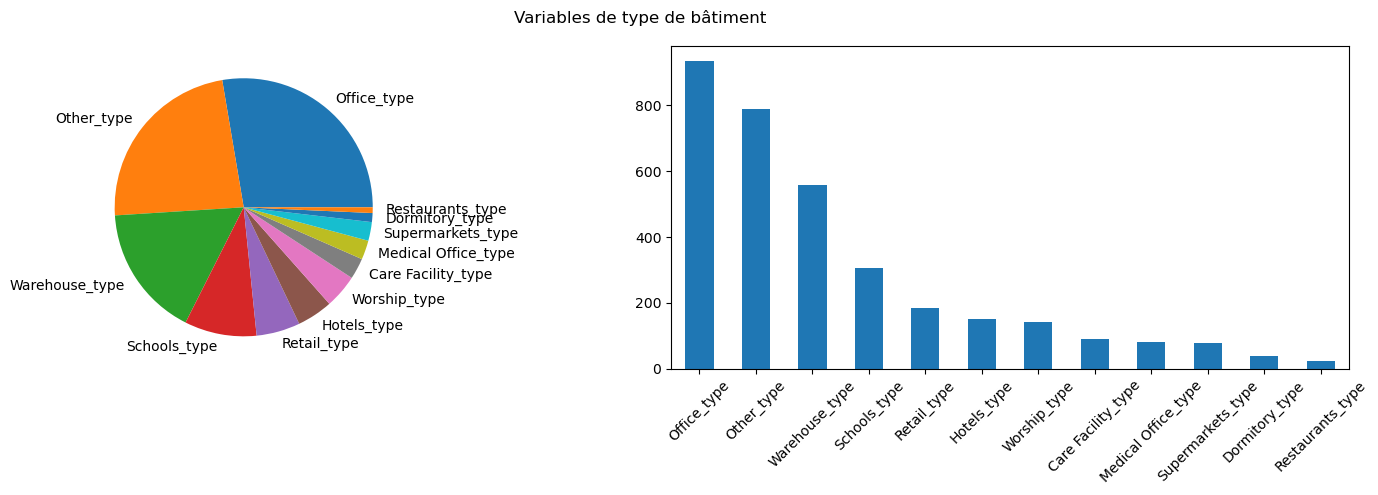

► Nouvelles dimensions du jeu de données : (3396, 29)


In [45]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Transformation de la variable catégorielle de type en numérique\n" + Style.RESET_ALL)
# Transformation des variable de type
df_type = pd.get_dummies(data['PrimaryPropertyType'])
print(Fore.GREEN + "► Variable de type de bâtiment transformée :" + Style.RESET_ALL)
display(df_type.sum().sort_values(ascending=False))
print(f"Taux de 'Other_type' ramené au nombre total de type de bâtiment : {100*df_type.sum()['Other_type']/df_type.sum().sum():.1f}%")

# Suppression des variables n'ayant aucune occurrence
df_type.drop(labels=['Bank_type', 'Courthouse_type', 'Hospitals_type', 'Parking_type'], axis=1, inplace=True)

# Représentation graphique
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15,5))
gs = GridSpec(nrows=1, ncols=2)
fig.add_subplot(gs[0, 0])
df_type.sum().sort_values(ascending=False).plot(kind='pie')
plt.ylabel(ylabel=None)
fig.add_subplot(gs[0, 1])
df_type.sum().sort_values(ascending=False).plot(kind='bar', rot=45)
fig.suptitle("Variables de type de bâtiment")
plt.tight_layout()
plt.show()

# Intégration dans le jeu de données
data = pd.concat([data, df_type], axis=1)
data.drop(labels=['BuildingType', 'PrimaryPropertyType'], axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

Transformation des variables catégorielle d'utilisation en numérique en lui affectant la surface correspondante

► Variable d'utilisation des bâtiments transformées :


Office_use            1.316e+08
Other_use             5.072e+07
Schools_use           4.147e+07
Parking_use           3.647e+07
Warehouse_use         3.423e+07
Hotels_use            2.367e+07
Retail_use            1.986e+07
Hospitals_use         1.371e+07
Medical Office_use    1.097e+07
Care Facility_use     1.090e+07
Supermarkets_use      7.836e+06
Worship_use           4.517e+06
Dormitory_use         3.017e+06
Restaurants_use       2.585e+06
Bank_use              1.834e+06
Courthouse_use        1.263e+06
dtype: float64

Taux de 'Other_use' ramené à la consommation totale d'énergie : 12.9%


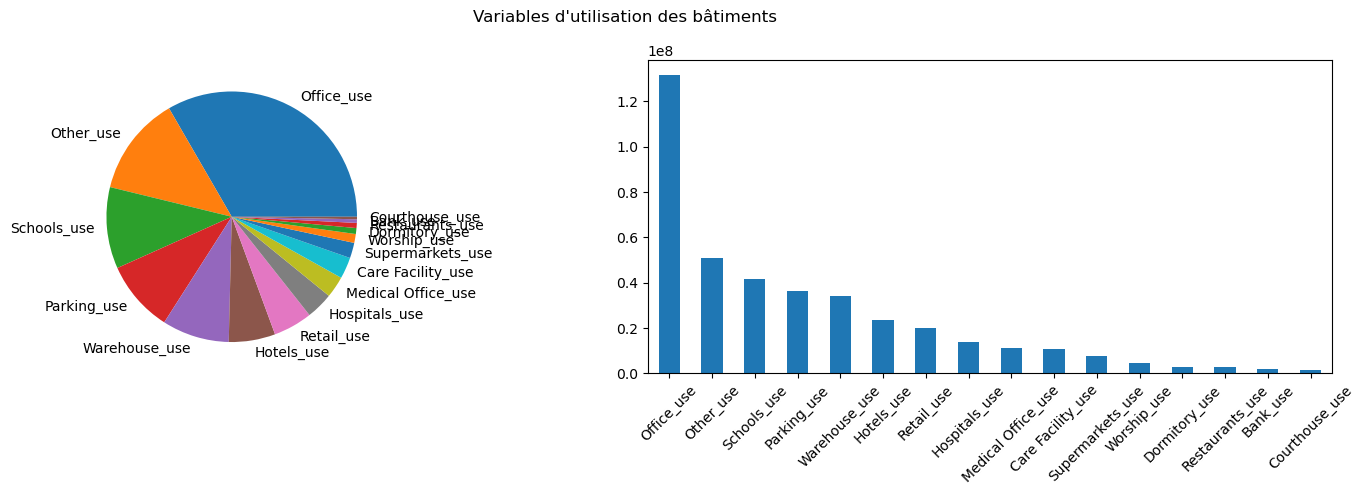

► Nouvelles dimensions du jeu de données : (3396, 39)


In [46]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE +
      "Transformation des variables catégorielle d'utilisation en numérique en lui affectant la surface correspondante\n"
      + Style.RESET_ALL)
# Variables d'utilisation
df_use1 = pd.get_dummies(data['LargestPropertyUseType']).mul(data['LargestPropertyUseTypeGFA'],axis=0)
df_use2 = pd.get_dummies(data['SecondLargestPropertyUseType']).mul(data['SecondLargestPropertyUseTypeGFA'],axis=0)
df_use3 = pd.get_dummies(data['ThirdLargestPropertyUseType']).mul(data['ThirdLargestPropertyUseTypeGFA'],axis=0)
df_use = df_use1 + df_use2 + df_use3
print(Fore.GREEN + "► Variable d'utilisation des bâtiments transformées :" + Style.RESET_ALL)
display(df_use.sum().sort_values(ascending=False))
print(f"Taux de 'Other_use' ramené à la consommation totale d'énergie : {100*df_use.sum()['Other_use']/df_use.sum().sum():.1f}%")

# Représentation graphique
fig = plt.figure(figsize=(15,5))
gs = GridSpec(nrows=1, ncols=2)
fig.add_subplot(gs[0, 0])
df_use.sum().sort_values(ascending=False).plot(kind='pie')
plt.ylabel(ylabel=None)
fig.add_subplot(gs[0, 1])
df_use.sum().sort_values(ascending=False).plot(kind='bar', rot=45)
fig.suptitle("Variables d'utilisation des bâtiments")
plt.tight_layout()
plt.show()

# Intégration dans le jeu de données
data = pd.concat([data, df_use], axis=1)
data.drop(labels=['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                  'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
          axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Changement d'échelle des variables d'utilisation de bâtiment, en proportion du maximum d'énergie totale consommée :


Bank_use   Care Facility_use  Courthouse_use  Dormitory_use  Hospitals_use  Hotels_use  Medical Office_use  Office_use  Parking_use  Restaurants_use  Retail_use  Schools_use  Supermarkets_use  Warehouse_use  Worship_use  Other_use
count    3396.000       3396.000          3396.000       3396.000      3.396e+03      3396.000        3396.000       3.396e+03    3396.000       3396.000       3396.000   3.396e+03        3396.000        3396.000       3396.00   3.396e+03
mean      540.124       3208.587           371.873        888.326      4.038e+03      6968.620        3228.968       3.875e+04   10740.385        761.164       5847.727   1.221e+04        2307.289       10079.772       1330.03   1.493e+04
std     10419.795      28795.318         13295.102      10002.665      6.067e+04     49895.442       26675.683       1.206e+05   40189.635       4987.395      28330.846   1.727e+05       21435.769       32710.824       6987.21   6.759e+04
min         0.000          0.000             0.000          0.000      0.000e+00         0.000           0.000       0.000e+00       0.000          0.000          0.000   0.000e+00           0.000           0.000          0.00   0.000e+00
25%         0.000          0.000             0.000          0.000      0.000e+00         0.000           0.000       0.000e+00       0.000          0.000          0.000   0.000e+00           0.000           0.000          0.00   0.000e+00
50%         0.000          0.000             0.000          0.000      0.000e+00         0.000           0.000       0.000e+00       0.000          0.000          0.000   0.000e+00           0.000           0.000          0.00   0.000e+00
75%         0.000          0.000             0.000          0.000      0.000e+00         0.000           0.000       2.556e+04       0.000          0.000          0.000   0.000e+00           0.000           0.000          0.00   0.000e+00
max    397214.910     724148.000        540360.000     325000.000      1.766e+06    956110.000      536159.076       1.633e+06  502304.041     102252.388     505103.000   9.320e+06      717919.127      661446.251     103000.00   1.400e+06

► Représentation graphique des valeurs non nulles :


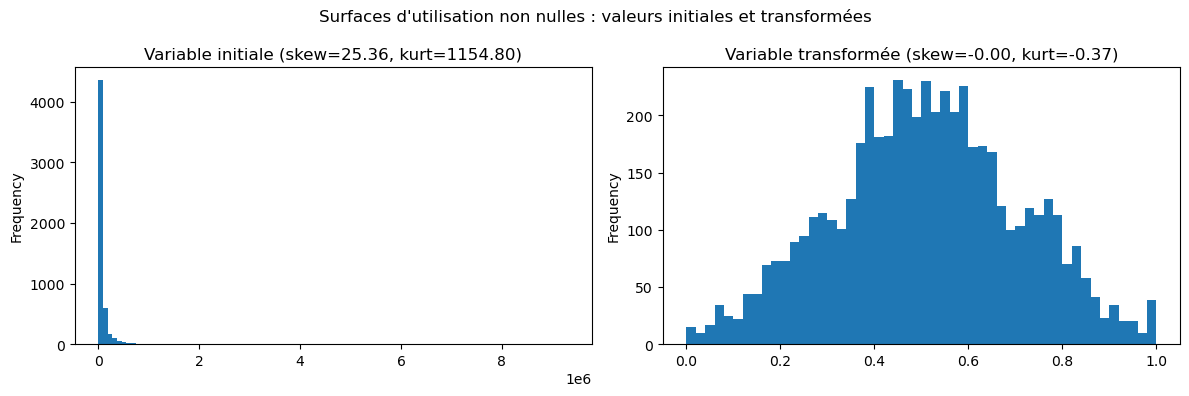

In [47]:
# Transformation des données
print(Fore.GREEN +
      "► Changement d'échelle des variables d'utilisation de bâtiment, en proportion du maximum d'énergie totale consommée :"
      + Style.RESET_ALL)

#data[new_use_cat] = data[new_use_cat] / data[new_use_cat].sum(axis=1).max()
display(data[new_use_cat].describe())

# Représentation graphique variable initiale
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1, 2, 1)
arr1 = data[new_use_cat].values.reshape(-1)
df1 = pd.DataFrame(np.delete(arr1, np.where(arr1==0)), columns=['use_gfa'])
df1['use_gfa'].plot(kind='hist', bins=100)
ax1.set_title(f"Variable initiale (skew={df1['use_gfa'].skew():.2f}, kurt={df1['use_gfa'].kurtosis():.2f})")

# Transformation avec log et mise à l'échelle [0, 1]
eps = 0.00115
data[new_use_cat] = np.log(eps+data[new_use_cat]/data[new_use_cat].max()) - np.log(eps)
min_gfa = data[new_use_cat].values.min()
max_gfa = data[new_use_cat].values.max()
data[new_use_cat] = (data[new_use_cat] - min_gfa) / (max_gfa - min_gfa)

# Transformation avec log et mise à l'échelle MinMax
ax2 = fig.add_subplot(1, 2, 2)
arr2 = data[new_use_cat].values.reshape(-1)
df2 = pd.DataFrame(np.delete(arr2, np.where(arr2==0)), columns=['transformed_use_gfa'])
df2['transformed_use_gfa'].plot(kind='hist', range=[eps, 1], bins=50)
ax2.set_title(f"Variable transformée (skew={df2['transformed_use_gfa'].skew():.2f}, kurt={df2['transformed_use_gfa'].kurtosis():.2f})")
plt.suptitle("Surfaces d'utilisation non nulles : valeurs initiales et transformées")
plt.tight_layout()
print(Fore.GREEN + "► Représentation graphique des valeurs non nulles :" + Style.RESET_ALL)
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_datayear"></a>
### 7.2 Variable d'année du jeu de données
Nous séparons cette variable en 2, une pour chaque année du jeu de données.

Transformation de la variable d'année du jeu de donnée en numérique

► Variable d'année des données :


2016    1702
2015    1694
dtype: int64

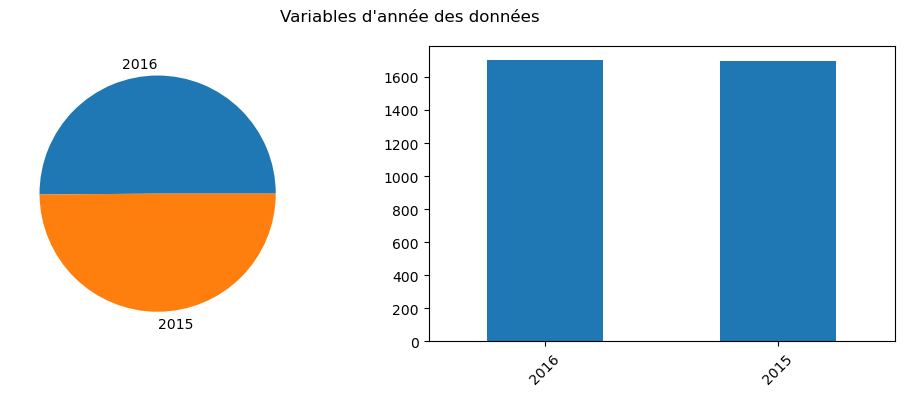

► Nouvelles dimensions du jeu de données : (3396, 40)


In [48]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Transformation de la variable d'année du jeu de donnée en numérique\n" + Style.RESET_ALL)
data['DataYear'] = data.DataYear.apply([lambda x: str(x)])
df = pd.get_dummies(data['DataYear'])

print(Fore.GREEN + "► Variable d'année des données :" + Style.RESET_ALL)
display(df.sum().sort_values(ascending=False))

# Représentation graphique
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10,4))
gs = GridSpec(nrows=1, ncols=2)
fig.add_subplot(gs[0, 0])
df.sum().sort_values(ascending=False).plot(kind='pie')
plt.ylabel(ylabel=None)
fig.add_subplot(gs[0, 1])
df.sum().sort_values(ascending=False).plot(kind='bar', rot=45)
fig.suptitle("Variables d'année des données")
plt.tight_layout()
plt.show()

# Intégration dans le jeu de données
data = pd.concat([data, df], axis=1)
data.drop(labels='DataYear', axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_gps"></a>
### 7.3 Variable de coordonnées GPS
Nous avons déjà examiné la représentation des coordonnées GPS sur la carte de Seattle et vérifié la distribution statistique sur le jeu de données.
Nous transformons ces variables en les ramenant vers une répartition centrée réduite.

Transformation des variables GPS en numérique

► Examen statistique :


Latitude  Longitude
count  3396.000  3396.000 
mean      0.500     0.413 
std       0.205     0.129 
min       0.000     0.000 
25%       0.370     0.357 
50%       0.483     0.413 
75%       0.642     0.472 
max       1.000     1.000

► Représentations graphiques :


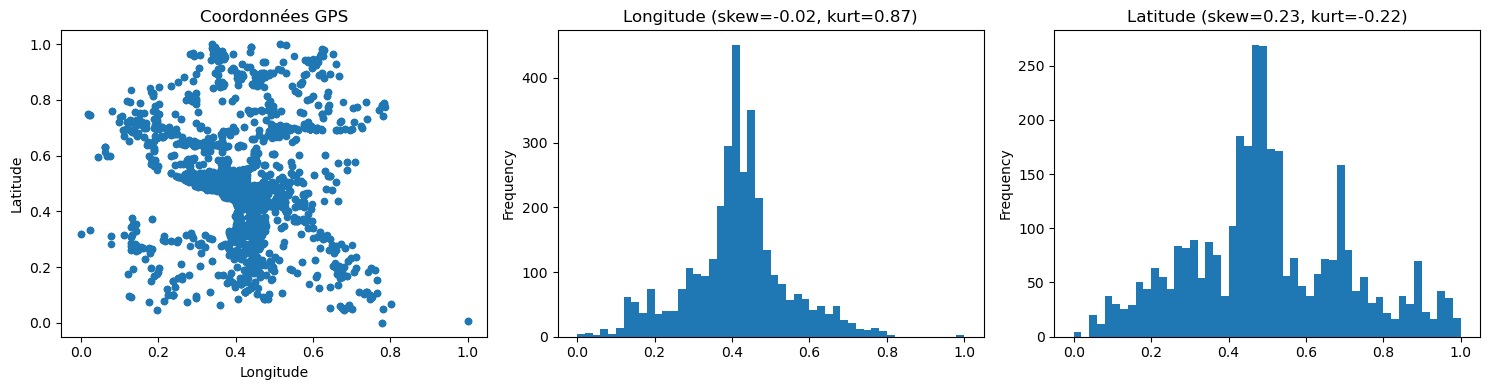

In [49]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Transformation des variables GPS en numérique\n" + Style.RESET_ALL)
# Mise à l'échelle MinMax
min_lat = data['Latitude'].values.min()
max_lat = data['Latitude'].values.max()
data['Latitude'] = (data['Latitude'] - min_lat) / (max_lat - min_lat)

min_lon = data['Longitude'].values.min()
max_lon = data['Longitude'].values.max()
data['Longitude'] = (data['Longitude'] - min_lon) / (max_lon - min_lon)

print(Fore.GREEN + "► Examen statistique :" + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(data[['Latitude', 'Longitude']].describe())

# Représentation graphique
print(Fore.GREEN + "► Représentations graphiques :" + Style.RESET_ALL)
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
data.plot(ax=ax1, x='Longitude', y='Latitude', kind='scatter')
ax1.set_title("Coordonnées GPS")
ax2 = fig.add_subplot(1, 3, 2)
data['Longitude'].plot(ax=ax2, kind='hist', bins=50)
ax2.set_title(f"Longitude (skew={data['Longitude'].skew():.2f}, kurt={data['Longitude'].kurtosis():.2f})")
ax3 = fig.add_subplot(1, 3, 3)
data['Latitude'].plot(ax=ax3, kind='hist', bins=50)
ax3.set_title(f"Latitude (skew={data['Latitude'].skew():.2f}, kurt={data['Latitude'].kurtosis():.2f})")
plt.tight_layout()
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_building"></a>
### 7.4 Variables de caractéristiques des bâtiments
Il s'agit des 3 variables 'YearBuilt', 'NumberofBuildings' et 'NumberofFloors'.

- Variable 'YearBuilt' : la variable est relativement uniforme et nous effectuons en conséquence une mise à l'échelle relative à l'âge des bâtiments.
- Variable 'NumberofBuildings' : compte tenu que 97% des valeurs de la variable vaut 1, cette variable n'aura pas d'impact sur la modélisation et nous la retirons.
- Variable 'NumberofFloors' : cette variable est concentré avec une traine sur la doite ; nous effectuons en conséquence une mise à l'échelle logarithmique puis une mise à l'échelle entre 0 et 1.

► Valeurs de la variable :


1    3288
2      28
3      24
5      16
4      10
Name: NumberofBuildings, dtype: int64

► Représentation graphique :


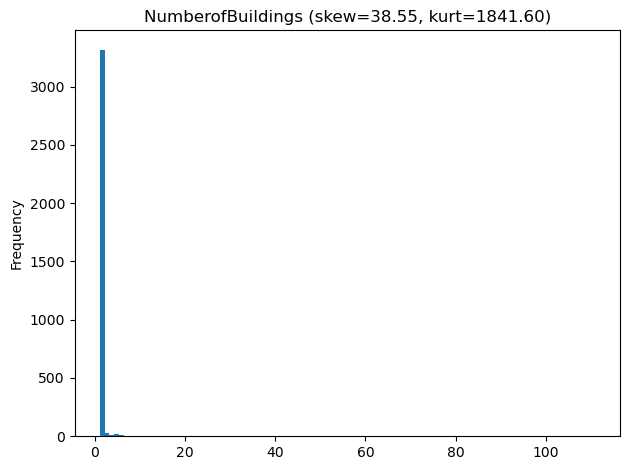

In [50]:
# Variable NumberofBuildings
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(Fore.GREEN + "► Valeurs de la variable :" + Style.RESET_ALL)
    display(data['NumberofBuildings'].value_counts().head())
# Représentation graphique
print(Fore.GREEN + "► Représentation graphique :" + Style.RESET_ALL)
data['NumberofBuildings'].plot(kind='hist', bins=100)
plt.title(f"NumberofBuildings (skew={data['NumberofBuildings'].skew():.2f}, kurt={data['NumberofBuildings'].kurtosis():.2f})")
plt.tight_layout()
plt.show()
# Suppression de la variable
data.drop(labels='NumberofBuildings', axis=1, inplace=True)

Examen et transformation des variables de caractéristiques des bâtiments

► Examen statistique :


YearBuilt
count  3396.00  
mean      0.46  
std       0.29  
min       0.00  
25%       0.22  
50%       0.43  
75%       0.74  
max       1.00

► Représentation graphique :


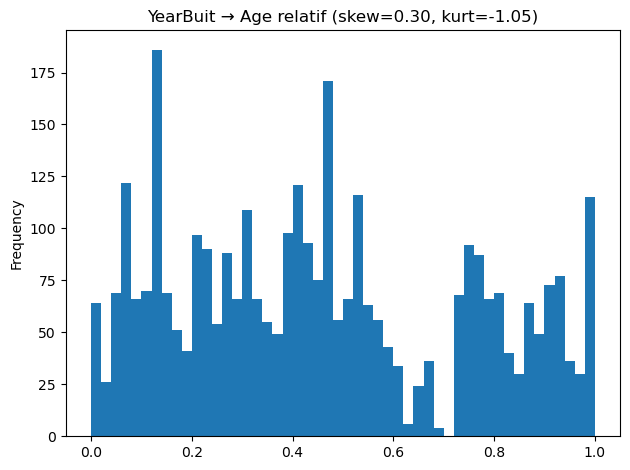

In [51]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen et transformation des variables de caractéristiques des bâtiments\n" + Style.RESET_ALL)
# Variable YearBuilt
year_built_max = data['YearBuilt'].values.max()
year_built_min = data['YearBuilt'].values.min()
data['YearBuilt'] = (year_built_max - data['YearBuilt']) / (year_built_max - year_built_min)
print(Fore.GREEN + "► Examen statistique :" + Style.RESET_ALL)
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(data[['YearBuilt']].describe())

# Représentation graphique
print(Fore.GREEN + "► Représentation graphique :" + Style.RESET_ALL)
data['YearBuilt'].plot(kind='hist', bins=50)
plt.title(f"YearBuit → Age relatif (skew={data['YearBuilt'].skew():.2f}, kurt={data['YearBuilt'].kurtosis():.2f})")
plt.tight_layout()
plt.show()

► Valeurs de la variable :


1     904
2     784
3     563
4     358
5     215
6     171
7      78
8      45
10     39
11     36
14     17
12     16
9      16
13     13
15     13
19     12
42     10
20      8
17      8
33      6
Name: NumberofFloors, dtype: int64

► Représentation graphique de NumberofFloors : variable initiale et transformée


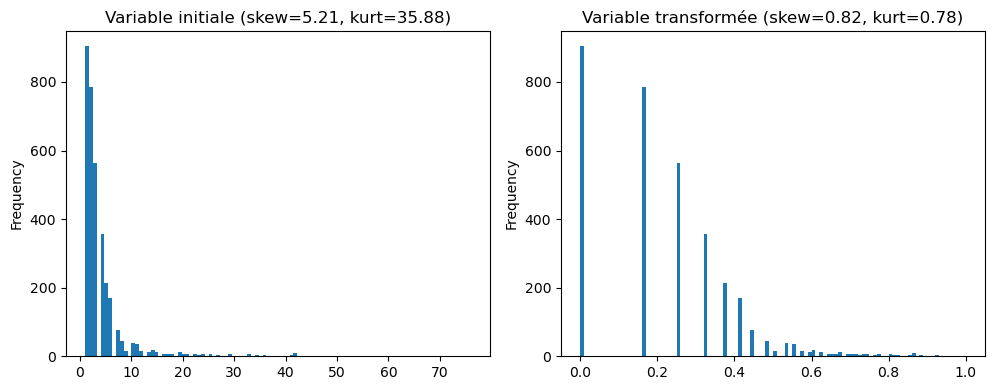

In [52]:
# Variable NumberofFloors
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(Fore.GREEN + "► Valeurs de la variable :" + Style.RESET_ALL)
    display(data['NumberofFloors'].value_counts().head(20))

# Représentation graphique variable initiale
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
data['NumberofFloors'].plot(kind='hist', bins=100)
ax1.set_title(f"Variable initiale (skew={data['NumberofFloors'].skew():.2f}, kurt={data['NumberofFloors'].kurtosis():.2f})")
# Transformation log
data['NumberofFloors'] = np.log(data['NumberofFloors'])
min_nbfloors = data['NumberofFloors'].values.min()
max_nbfloors = data['NumberofFloors'].values.max()
data['NumberofFloors'] = (data['NumberofFloors'] - min_nbfloors) / (max_nbfloors - min_nbfloors)
# Représentation graphique variable transformée
ax2 = fig.add_subplot(1, 3, 2)
data['NumberofFloors'].plot(kind='hist', bins=100)
ax2.set_title(f"Variable transformée (skew={data['NumberofFloors'].skew():.2f}, kurt={data['NumberofFloors'].kurtosis():.2f})")
plt.tight_layout()
print(Fore.GREEN + "► Représentation graphique de NumberofFloors : variable initiale et transformée" + Style.RESET_ALL)
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_nrj"></a>
### 7.5 Variable énergie
Cette variable a une distribution très concentrée avec une traine sur la droite ; nous effectuons en conséquence une transformation logarithmique puis une mise à l'échelle entre 0 et 1.

Examen et transformation de la variable de consommation d'énergie

► Statistiques de la variable SiteEnergyUse(kBtu) :


count        3396
mean      8047522
std      24979130
min         11441
25%       1245097
50%       2563995
75%       6883780
max     873923712
Name: SiteEnergyUse(kBtu), dtype: float64

► Représentation graphique de SiteEnergyUse(kBtu): variable initiale et transformée


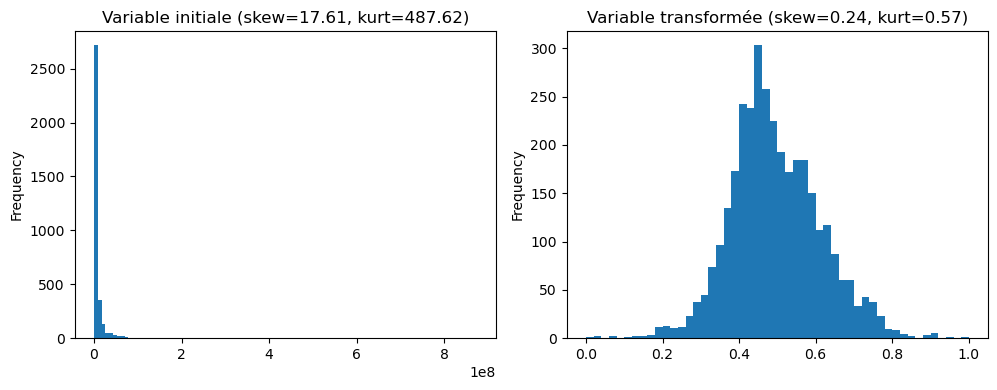

In [53]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen et transformation de la variable de consommation d'énergie\n" + Style.RESET_ALL)
# Variable SiteEnergyUse(kBtu)
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(Fore.GREEN + "► Statistiques de la variable SiteEnergyUse(kBtu) :" + Style.RESET_ALL)
    display(data['SiteEnergyUse(kBtu)'].describe())

# Représentation graphique variable initiale
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
data['SiteEnergyUse(kBtu)'].plot(kind='hist', bins=100)
ax1.set_title(f"Variable initiale (skew={data['SiteEnergyUse(kBtu)'].skew():.2f}, kurt={data['SiteEnergyUse(kBtu)'].kurtosis():.2f})")
# Transformation log et mise à l'échelle [0, 1]
data['SiteEnergyUse(kBtu)'] = np.log(data['SiteEnergyUse(kBtu)'])
fct.min_nrj = data['SiteEnergyUse(kBtu)'].values.min()
fct.max_nrj = data['SiteEnergyUse(kBtu)'].values.max()
fct.mean_nrj = data['SiteEnergyUse(kBtu)'].values.mean()
data['SiteEnergyUse(kBtu)'] = (data['SiteEnergyUse(kBtu)'] - fct.min_nrj) / (fct.max_nrj - fct.min_nrj)
# Représentation graphique variable transformée
ax2 = fig.add_subplot(1, 3, 2)
data['SiteEnergyUse(kBtu)'].plot(kind='hist', bins=50)
ax2.set_title(f"Variable transformée (skew={data['SiteEnergyUse(kBtu)'].skew():.2f}, kurt={data['SiteEnergyUse(kBtu)'].kurtosis():.2f})")
plt.tight_layout()
print(Fore.GREEN + "► Représentation graphique de SiteEnergyUse(kBtu): variable initiale et transformée" + Style.RESET_ALL)
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_ghg"></a>
### 7.6 Variable émission de GES
Cette variable a une distribution très concentrée avec une traine sur la droite ; nous effectuons en conséquence une transformation logarithmique puis une mise à l'échelle entre 0 et 1.

Examen et transformation de la variable d'émission de GES

► Statistiques de la variable TotalGHGEmissions :


count    3396
mean      178
std       661
min         0
25%        20
50%        50
75%       139
max     16871
Name: TotalGHGEmissions, dtype: float64

► Représentation graphique de TotalGHGEmissions: variable initiale et transformée


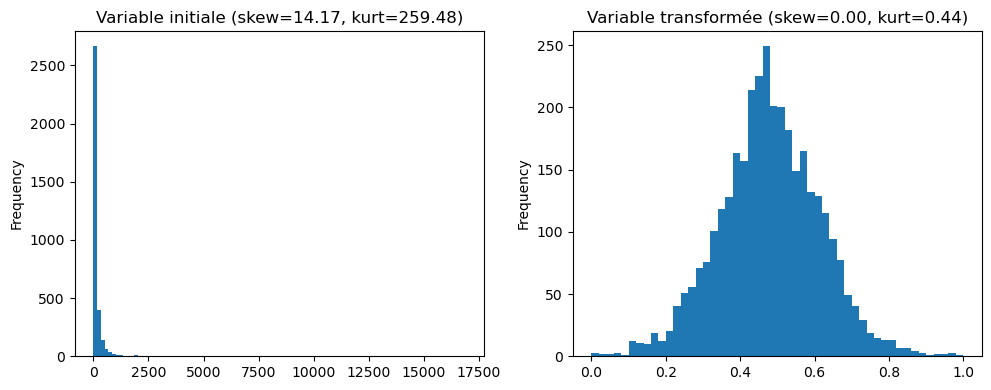

In [54]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen et transformation de la variable d'émission de GES\n" + Style.RESET_ALL)# Variable TotalGHGEmissions
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(Fore.GREEN + "► Statistiques de la variable TotalGHGEmissions :" + Style.RESET_ALL)
    display(data['TotalGHGEmissions'].describe())

# Représentation graphique variable initiale
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
data['TotalGHGEmissions'].plot(kind='hist', bins=100)
ax1.set_title(f"Variable initiale (skew={data['TotalGHGEmissions'].skew():.2f}, kurt={data['TotalGHGEmissions'].kurtosis():.2f})")
# Transformation avec log et mise à l'échelle MinMax
fct.eps = 0.175
data['TotalGHGEmissions'] = np.log(fct.eps+data['TotalGHGEmissions']) - np.log(fct.eps)
fct.min_ghg = data['TotalGHGEmissions'].values.min()
fct.max_ghg = data['TotalGHGEmissions'].values.max()
fct.mean_ghg = data['TotalGHGEmissions'].values.mean()
data['TotalGHGEmissions'] = (data['TotalGHGEmissions'] - fct.min_ghg) / (fct.max_ghg - fct.min_ghg)
# Représentation graphique variable transformée
ax2 = fig.add_subplot(1, 3, 2)
data['TotalGHGEmissions'].plot(kind='hist', bins=50)
ax2.set_title(f"Variable transformée (skew={data['TotalGHGEmissions'].skew():.2f}, kurt={data['TotalGHGEmissions'].kurtosis():.2f})")
plt.tight_layout()
print(Fore.GREEN + "► Représentation graphique de TotalGHGEmissions: variable initiale et transformée" + Style.RESET_ALL)
plt.show()

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_nrjstarscore"></a>
### 7.7 Variable EnergyStarScore
Cette variable est comprise entre 1 et 100 et présente une distribution répartie entre ces 2 valeurs. Nous effectuons en conséquence une simple transformation d'échelle (division par 100) pour la ramener entre 0 et 1.

Examen et transformation de la variable EnergyStarScore

► Statistiques de la variable ENERGYSTARScore :


count   2280
mean      65
std       29
min        1
25%       48
50%       73
75%       89
max      100
Name: ENERGYSTARScore, dtype: float64

► Représentation graphique de TotalGHGEmissions: variable initiale et transformée


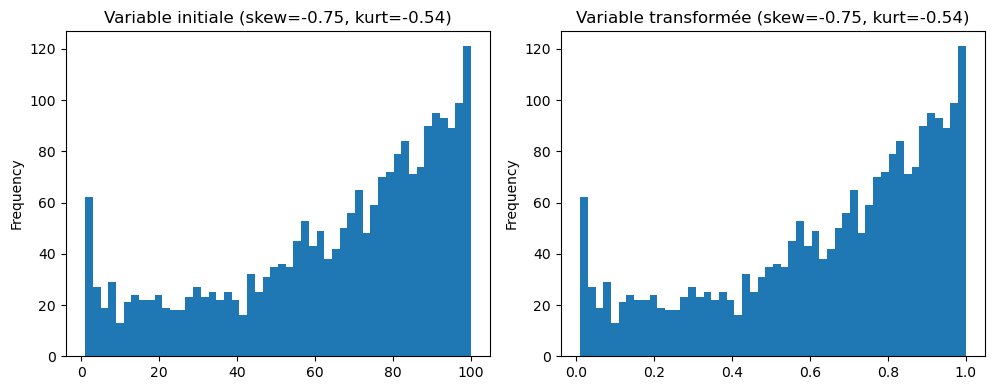

In [55]:
print(Fore.BLACK + Style.BRIGHT + Back.WHITE + "Examen et transformation de la variable EnergyStarScore\n" + Style.RESET_ALL)
# Variable ENERGYSTARScore
df = data.loc[~data['ENERGYSTARScore'].isnull(), 'ENERGYSTARScore']
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(Fore.GREEN + "► Statistiques de la variable ENERGYSTARScore :" + Style.RESET_ALL)
    display(df.describe())

# Représentation graphique variable initiale
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1, 3, 1)
df.plot(kind='hist', bins=50)
ax1.set_title(f"Variable initiale (skew={df.skew():.2f}, kurt={df.kurtosis():.2f})")

# Transformation
df = df / 100

# Représentation graphique variable transformée
ax2 = fig.add_subplot(1, 3, 2)
df.plot(kind='hist', bins=50)
ax2.set_title(f"Variable transformée (skew={df.skew():.2f}, kurt={df.kurtosis():.2f})")
plt.tight_layout()
print(Fore.GREEN + "► Représentation graphique de TotalGHGEmissions: variable initiale et transformée" + Style.RESET_ALL)
plt.show()

# Transformation dans le jeu de données
data['ENERGYSTARScore'] = data['ENERGYSTARScore'] /100

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="ea_bilan"></a>
### 7.8 Bilan du jeu de données transformé

In [56]:
print(data.columns)
data = data[['OSEBuildingID', 'PropertyName', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors', 'Care Facility_type', 'Dormitory_type', 'Hotels_type', 'Medical Office_type', 'Office_type', 'Restaurants_type', 'Retail_type', 'Schools_type', 'Supermarkets_type', 'Warehouse_type', 'Worship_type', 'Other_type', 'Bank_use', 'Care Facility_use', 'Courthouse_use', 'Dormitory_use', 'Hospitals_use', 'Hotels_use', 'Medical Office_use', 'Office_use', 'Parking_use', 'Restaurants_use', 'Retail_use', 'Schools_use', 'Supermarkets_use', 'Warehouse_use', 'Worship_use', 'Other_use', '2015', '2016', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]
print(Fore.GREEN + "► Dimensions du jeu de données : " + Style.RESET_ALL, data.shape, '\n')
print(Fore.GREEN + "► Jeu de données :" + Style.RESET_ALL)
display(data)
print(Fore.GREEN + "► Informations sur le jeu de données :" + Style.RESET_ALL)
display(data.info())

Index(['OSEBuildingID', 'PropertyName', 'YearBuilt', 'NumberofFloors', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Latitude', 'Longitude', 'Care Facility_type', 'Dormitory_type', 'Hotels_type', 'Medical Office_type', 'Office_type', 'Restaurants_type', 'Retail_type', 'Schools_type', 'Supermarkets_type', 'Warehouse_type', 'Worship_type', 'Other_type', 'Bank_use', 'Care Facility_use', 'Courthouse_use', 'Dormitory_use', 'Hospitals_use', 'Hotels_use', 'Medical Office_use', 'Office_use', 'Parking_use', 'Restaurants_use', 'Retail_use', 'Schools_use', 'Supermarkets_use', 'Warehouse_use', 'Worship_use', 'Other_use', '2015', '2016'], dtype='object')
► Dimensions du jeu de données :  (3396, 39) 

► Jeu de données :


OSEBuildingID             PropertyName              Latitude  Longitude  YearBuilt  NumberofFloors  Care Facility_type  Dormitory_type  Hotels_type  Medical Office_type  Office_type  Restaurants_type  Retail_type  Schools_type  Supermarkets_type  Warehouse_type  Worship_type  Other_type  Bank_use  Care Facility_use  Courthouse_use  Dormitory_use  Hospitals_use  Hotels_use  Medical Office_use  Office_use  Parking_use  Restaurants_use  Retail_use  Schools_use  Supermarkets_use  Warehouse_use  Worship_use  Other_use  2015  2016  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions
0             1                     Mayflower park hotel    0.482     0.387      0.765         0.574               0                 0             1                0                0               0              0             0               0                 0              0            0         0.0           0.0               0.0            0.0            0.0          0.650            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.65               0.570               0.620      
1             2                          Paramount Hotel    0.486     0.408      0.165         0.554               0                 0             1                0                0               0              0             0               0                 0              0            0         0.0           0.0               0.0            0.0            0.0          0.642            0.0            0.000       0.487          0.546           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.51               0.586               0.625      
2             3                  5673-The Westin Seattle    0.489     0.386      0.400         0.857               0                 0             1                0                0               0              0             0               0                 0              0            0         0.0           0.0               0.0            0.0            0.0          1.000            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.18               0.779               0.811      
3             5                                HOTEL MAX    0.490     0.394      0.774         0.532               0                 0             1                0                0               0              0             0               0                 0              0            0         0.0           0.0               0.0            0.0            0.0          0.597            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.01               0.695               0.805      
4             8              WARWICK SEATTLE HOTEL (ID8)    0.488     0.374      0.304         0.667               0                 0             1                0                0               0              0             0               0                 0              0            0         0.0           0.0               0.0            0.0            0.0          0.687            0.0            0.000       0.692          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.67               0.637               0.684      
...             ...                                  ...       ...        ...        ...             ...                 ...             ...          ...                  ...          ...               ...          ...           ...                ...             ...           ...         ...       ...                ...             ...            ...            ...         ...                 ...         ...          ...              ...

► Informations sur le jeu de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OSEBuildingID        3396 non-null   int64  
 1   PropertyName         3396 non-null   object 
 2   Latitude             3396 non-null   float64
 3   Longitude            3396 non-null   float64
 4   YearBuilt            3396 non-null   float64
 5   NumberofFloors       3396 non-null   float64
 6   Care Facility_type   3396 non-null   uint8  
 7   Dormitory_type       3396 non-null   uint8  
 8   Hotels_type          3396 non-null   uint8  
 9   Medical Office_type  3396 non-null   uint8  
 10  Office_type          3396 non-null   uint8  
 11  Restaurants_type     3396 non-null   uint8  
 12  Retail_type          3396 non-null   uint8  
 13  Schools_type         3396 non-null   uint8  
 14  Supermarkets_type    3396 non-null   uint8  
 15 

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="multivar"></a>
## 8- Analyse exploratoire multivariée
Notre analyse consiste en la recherche de corrélation, s'agissant d'une part les variables numériques entre elles, et d'autre parts, des variables numériques avec les variables catégorielles.

<a id="multivar_num"></a>
### 8.1 Variables numériques entre elles
Nous constatons :
- Une forte corrélation entre les variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions', ce qui semble tout à fait normal.
- Une certaine corrélation entre ces variables et 'NumberofFloors'.

* Recherche de corrélations potentielle entre les caractéristiques numériques , coefficient de Pearson > 0.25 :
  -> Liste des 9 paires de caractéristiques à examiner :


[['NumberofFloors', 'Hotels_use'],
 ['NumberofFloors', 'Office_use'],
 ['NumberofFloors', 'Parking_use'],
 ['NumberofFloors', 'SiteEnergyUse(kBtu)'],
 ['NumberofFloors', 'TotalGHGEmissions'],
 ['Office_use', 'Parking_use'],
 ['Office_use', 'SiteEnergyUse(kBtu)'],
 ['Parking_use', 'SiteEnergyUse(kBtu)'],
 ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

  -> Table des corrélations :


► Représentations graphiques des cibles, paire ['NumberofFloors', 'SiteEnergyUse(kBtu)']:
Nuage complet, Pearson=0.51


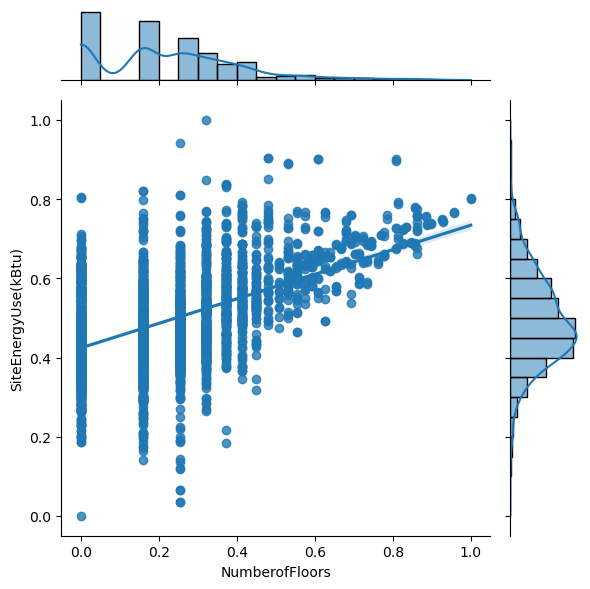

► Représentations graphiques des cibles, paire ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
Nuage complet, Pearson=0.90


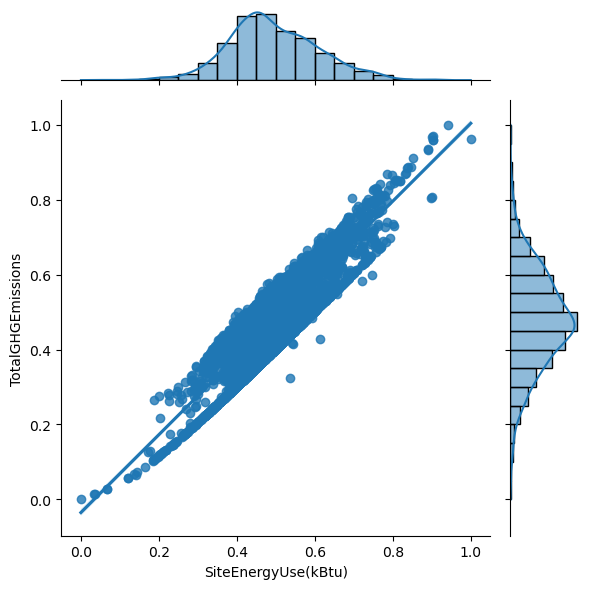

► Représentation graphique des variables entre elles, paire ['NumberofFloors', 'Hotels_use']:


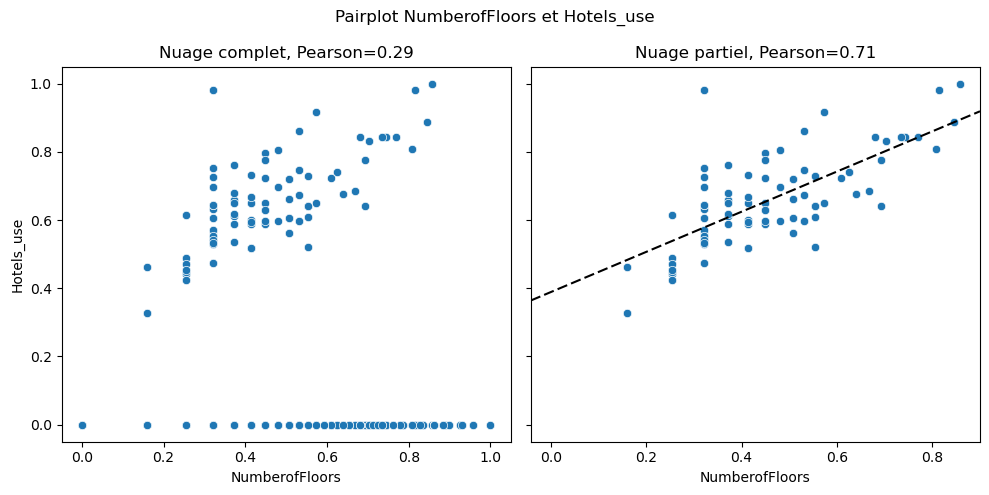

► Représentation graphique des variables entre elles, paire ['NumberofFloors', 'Office_use']:


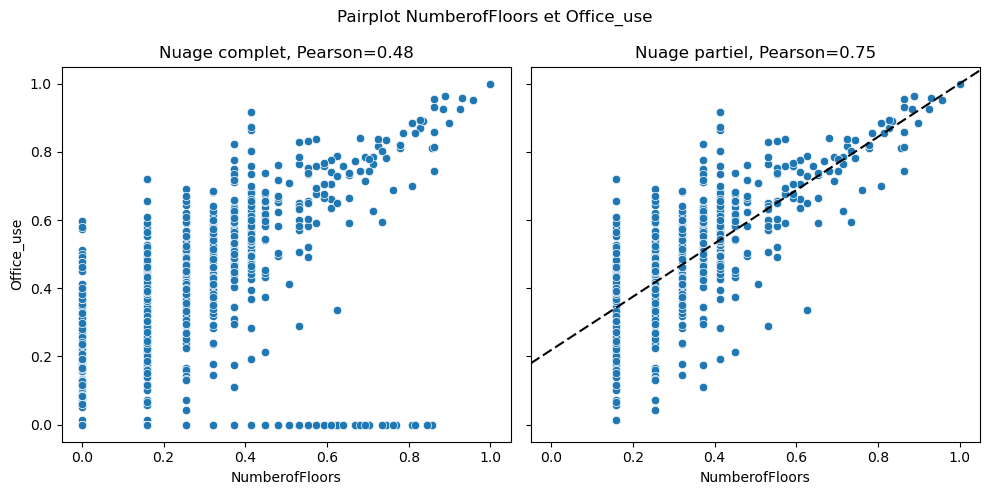

► Représentation graphique des variables entre elles, paire ['NumberofFloors', 'Parking_use']:


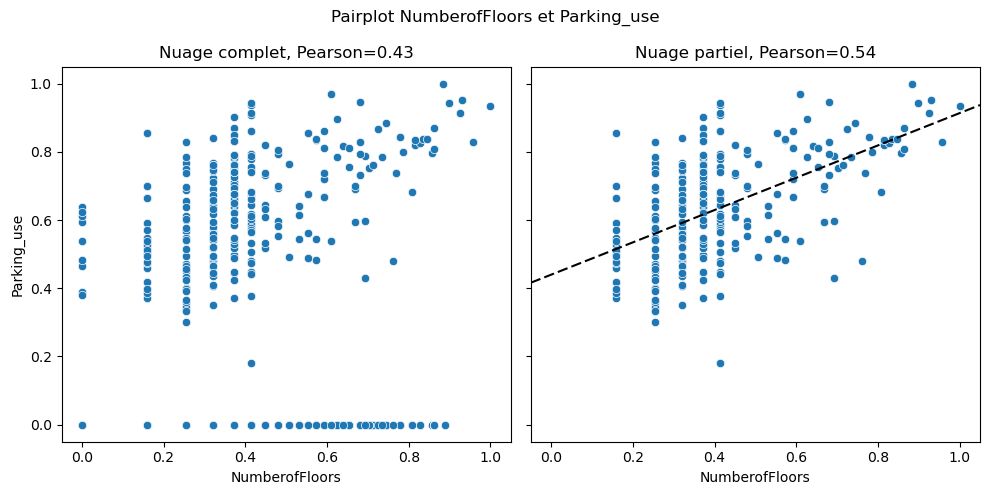

► Représentation graphique des variables entre elles, paire ['Office_use', 'Parking_use']:


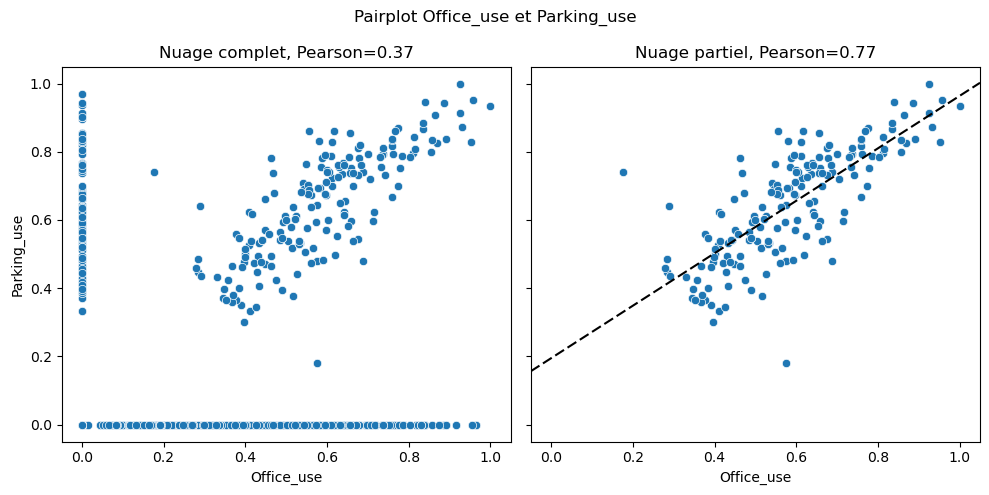

In [57]:
# Liste des variables numériques
num_features = ['Latitude', 'Longitude', 'YearBuilt', 'NumberofFloors', 'Bank_use', 'Care Facility_use', 'Courthouse_use', 'Dormitory_use', 'Hospitals_use', 'Hotels_use', 'Medical Office_use', 'Office_use', 'Parking_use', 'Restaurants_use', 'Retail_use', 'Schools_use', 'Supermarkets_use', 'Warehouse_use', 'Worship_use', 'Other_use', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

# Recherche de corrélations
fct.thresshold = 0.5
fct.cor_table(data, num_features, thresshold=0.25)

# Représentations graphiques de paires contenants les cibles
pairs = [['NumberofFloors', 'SiteEnergyUse(kBtu)'], ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]
for pair in pairs:
    print(Fore.GREEN + f"► Représentations graphiques des cibles, paire {pair}:" + Style.RESET_ALL)
    fct.pair_plot(data, pair)

# Représentations graphiques de paires entre features
pairs = [['NumberofFloors', 'Hotels_use'], ['NumberofFloors', 'Office_use'], ['NumberofFloors', 'Parking_use'], ['Office_use', 'Parking_use']]
for pair in pairs:
    print(Fore.GREEN + f"► Représentation graphique des variables entre elles, paire {pair}:" + Style.RESET_ALL)
    fct.pair_plot(data, pair, exclude_x=0, exclude_y=0)

[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="multivar_catnum"></a>
### 8.2 Variables par paires (catégorielle, numérique)
Nous constatons :
- Une corrélation entre les paires de variables *_type et *_use, ce qui n'est pas surprenant, compte tenu qu'elles correspondent à la même catégorie de propriété.
- l'absence de corrélation entre les variables a_type et b_use si a≠b.

Il apparaît donc que les variables *_type sont redondantes avec les variables *_use. Nous les éliminons en conséquence du jeu de données.

In [58]:
# Liste des variables catégorielles
cat_features = ['Care Facility_type', 'Dormitory_type', 'Hotels_type', 'Medical Office_type', 'Office_type', 'Restaurants_type', 'Retail_type', 'Schools_type', 'Supermarkets_type', 'Warehouse_type', 'Worship_type', 'Other_type', '2015', '2016']

# Recherche de corrélations
fct.thresshold = 0.5
fct.eta_table(data, cat_features, num_features, thresshold=0.2)

* Recherche de corrélations potentielle entre caractéristiques catégorielles et numériques , coefficient η² > 0.2 :
  -> Liste des 11 paires de caractéristiques à examiner :


[['Care Facility_type', 'Care Facility_use'],
 ['Dormitory_type', 'Dormitory_use'],
 ['Hotels_type', 'Hotels_use'],
 ['Medical Office_type', 'Medical Office_use'],
 ['Office_type', 'Office_use'],
 ['Other_type', 'Other_use'],
 ['Retail_type', 'Retail_use'],
 ['Schools_type', 'Schools_use'],
 ['Supermarkets_type', 'Supermarkets_use'],
 ['Warehouse_type', 'Warehouse_use'],
 ['Worship_type', 'Worship_use']]


  -> Table des corrélations :


In [59]:
# Suppression des variables _type
rm_list = ['Care Facility_type', 'Dormitory_type', 'Hotels_type', 'Medical Office_type', 'Office_type', 'Restaurants_type', 'Retail_type', 'Schools_type', 'Supermarkets_type', 'Warehouse_type', 'Worship_type', 'Other_type']
data.drop(labels=rm_list, axis=1, inplace=True)
print(Fore.GREEN + "► Nouvelles dimensions du jeu de données :" + Style.RESET_ALL, f"{data.shape}")

► Nouvelles dimensions du jeu de données : (3396, 27)


[<font color='red'><em>retour sommaire</em></font>](#sommaire)

<a id="bilan_final"></a>
### 8.3 Bilan du jeu de données
A l'issue des analyses exploratoires de ce Notebook, le jeu de données consiste en :
- 27 variables
  - dont 4 variables liées à l'identification des bâtiments (OSEBuildingID, PropertyName, Latitude et Longitude)
  - dont 2 variables cibles : SiteEnergyUse(kBtu) et TotalGHGEmissions
  - dont 23 variables d'entrée pour le machine learning (dont Latitude et Longitude et ENERGYSTARScore).

- 3396 observations, parmi lesquelles la plupart figurent à la fois dans les relevés de 2015 et de 2016.

In [60]:
print(Fore.GREEN + "► Dimensions du jeu de données : " + Style.RESET_ALL, data.shape, '\n')
print(Fore.GREEN + "► Jeu de données :" + Style.RESET_ALL)
display(data)
print(Fore.GREEN + "► Informations sur le jeu de données :" + Style.RESET_ALL)
display(data.info())

# Enregistrement du jeu dans un fichier
data.to_csv(dir_data + "\\" + "building-energy-benchmarking-transformed.csv", encoding='utf-8-sig', index=False, sep=';')

► Dimensions du jeu de données :  (3396, 27) 

► Jeu de données :


OSEBuildingID             PropertyName              Latitude  Longitude  YearBuilt  NumberofFloors  Bank_use  Care Facility_use  Courthouse_use  Dormitory_use  Hospitals_use  Hotels_use  Medical Office_use  Office_use  Parking_use  Restaurants_use  Retail_use  Schools_use  Supermarkets_use  Warehouse_use  Worship_use  Other_use  2015  2016  ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions
0             1                     Mayflower park hotel    0.482     0.387      0.765         0.574         0.0           0.0               0.0            0.0            0.0          0.650            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.65               0.570               0.620      
1             2                          Paramount Hotel    0.486     0.408      0.165         0.554         0.0           0.0               0.0            0.0            0.0          0.642            0.0            0.000       0.487          0.546           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.51               0.586               0.625      
2             3                  5673-The Westin Seattle    0.489     0.386      0.400         0.857         0.0           0.0               0.0            0.0            0.0          1.000            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.18               0.779               0.811      
3             5                                HOTEL MAX    0.490     0.394      0.774         0.532         0.0           0.0               0.0            0.0            0.0          0.597            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.01               0.695               0.805      
4             8              WARWICK SEATTLE HOTEL (ID8)    0.488     0.374      0.304         0.667         0.0           0.0               0.0            0.0            0.0          0.687            0.0            0.000       0.692          0.000           0.0        0.000            0.0             0.0           0.0        0.000      1     0        0.67               0.637               0.684      
...             ...                                  ...       ...        ...        ...             ...       ...                ...             ...            ...            ...         ...                 ...         ...          ...              ...         ...          ...               ...            ...          ...        ...   ...   ...              ...                  ...                ...
3391      50222                    Horticulture building    0.290     0.525      0.217         0.000         0.0           0.0               0.0            0.0            0.0          0.000            0.0            0.299       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.000      0     1        0.46               0.383               0.398      
3392      50223      International district/Chinatown CC    0.414     0.466      0.096         0.000         0.0           0.0               0.0            0.0            0.0          0.000            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.353      0     1         NaN               0.393               0.436      
3393      50224                          Queen Anne Pool    0.585     0.283      0.357         0.000         0.0           0.0               0.0            0.0            0.0          0.000            0.0            0.000       0.000          0.000           0.0        0.000            0.0             0.0           0.0        0.327      0     1         NaN   

► Informations sur le jeu de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OSEBuildingID        3396 non-null   int64  
 1   PropertyName         3396 non-null   object 
 2   Latitude             3396 non-null   float64
 3   Longitude            3396 non-null   float64
 4   YearBuilt            3396 non-null   float64
 5   NumberofFloors       3396 non-null   float64
 6   Bank_use             3396 non-null   float64
 7   Care Facility_use    3396 non-null   float64
 8   Courthouse_use       3396 non-null   float64
 9   Dormitory_use        3396 non-null   float64
 10  Hospitals_use        3396 non-null   float64
 11  Hotels_use           3396 non-null   float64
 12  Medical Office_use   3396 non-null   float64
 13  Office_use           3396 non-null   float64
 14  Parking_use          3396 non-null   float64
 15 

None

[<font color='red'><em>retour sommaire</em></font>](#sommaire)